# Generating Sample Data from Distributions
Then treating data as if they were samples of real data

* https://github.com/ijmbarr/causalgraphicalmodels
* https://github.com/ijmbarr/causalgraphicalmodels/blob/master/notebooks/cgm-examples.ipynb
* https://en.wikipedia.org/wiki/Vehicular_metrics

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (20, 8)
mpl.rcParams['axes.titlesize'] = 24
mpl.rcParams['axes.labelsize'] = 16
mpl.rc('xtick', labelsize=15) 
mpl.rc('ytick', labelsize=15)

In [4]:
import pandas as pd
print(pd.__version__)

2.1.2


In [5]:
import numpy as np

In [6]:
from scipy.stats import skewnorm

In [7]:
import seaborn as sns

In [8]:
# !pip install causalgraphicalmodels

In [9]:
# does not work with Python >= 3.10

# https://github.com/ijmbarr/causalgraphicalmodels
# https://github.com/ijmbarr/causalgraphicalmodels/blob/master/notebooks/cgm-examples.ipynb
from causalgraphicalmodels import StructuralCausalModel

In [10]:
# https://en.wikipedia.org/wiki/Vehicular_metrics

braking_distance_mean = 40
braking_distance_std = 5
power_mean = 100
power_std = 50

car_safety_model = StructuralCausalModel({
    "emergency_braking": lambda n_samples: np.random.binomial(1, p=0.60, size=n_samples), 
    "braking_distance": lambda n_samples: np.random.normal(loc=braking_distance_mean, scale=braking_distance_std, size=n_samples),
    "power": lambda n_samples: skewnorm.rvs(a=2, loc=power_mean, scale=power_std, size=n_samples),
    "car_safety": \
        lambda emergency_braking, braking_distance, power, n_samples: \
            np.random.normal(loc=emergency_braking - \
                             # having a braking distance below average is negative, so we have to subtract
                             (braking_distance - braking_distance_mean) / braking_distance_std - \
                             # all deviation from good amount of power is negative
                             abs(power - power_mean) / power_std, \
                             scale=0.1)
})

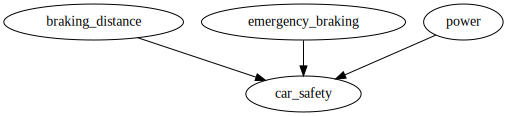

In [11]:
car_safety_model.cgm.draw()

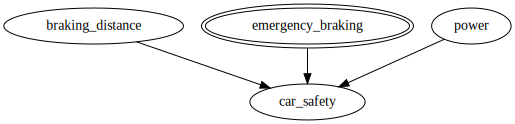

In [12]:
car_safety_model_do_emergency_braking = car_safety_model.do("emergency_braking")

car_safety_model_do_emergency_braking.cgm.draw()

In [13]:
car_safety_model.cgm.get_distribution()

'P(emergency_braking)P(braking_distance)P(power)P(car_safety|emergency_braking,braking_distance,power)'

In [14]:
n_samples=10_000
# data = car_safety_model_do_emergency_braking.sample(n_samples=n_samples, 
#                                                      set_values={"emergency_braking": np.ones(n_samples)})
data = car_safety_model.sample(n_samples=n_samples)
data.head()

emergency_braking  braking_distance       power  car_safety
0                  1         32.936274  164.891413    0.914950
1                  0         37.380537  113.996049    0.153792
2                  1         41.455630   98.443678    0.729766
3                  1         36.179473  221.584650   -0.616974
4                  0         36.092918  129.287158    0.199803

In [15]:
braking_distance = 31.983544

In [16]:
(braking_distance - braking_distance_mean) / braking_distance_std

-1.6032912000000004

In [17]:
power = 50

In [18]:
abs(power - power_mean) / power_std

1.0

In [19]:
data.describe()

emergency_braking  braking_distance         power    car_safety
count       10000.000000      10000.000000  10000.000000  10000.000000
mean            0.602800         40.017578    135.792891     -0.202019
std             0.489343          5.055335     34.928120      1.284712
min             0.000000         22.342940     38.378967     -4.803403
25%             0.000000         36.582744    111.181424     -1.062602
50%             1.000000         39.985545    132.891582     -0.162600
75%             1.000000         43.535723    157.543245      0.684063
max             1.000000         59.101069    286.899254      3.985699

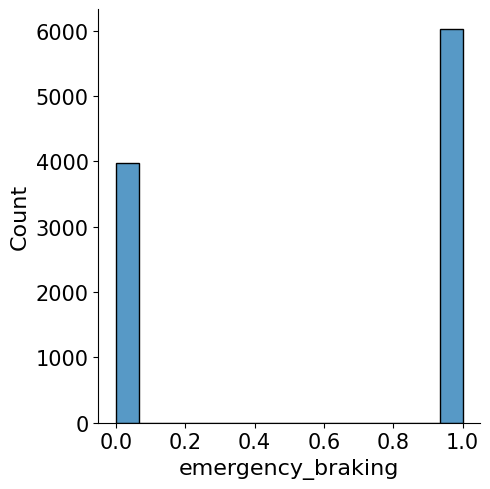

In [20]:
sns.displot(data["emergency_braking"]);

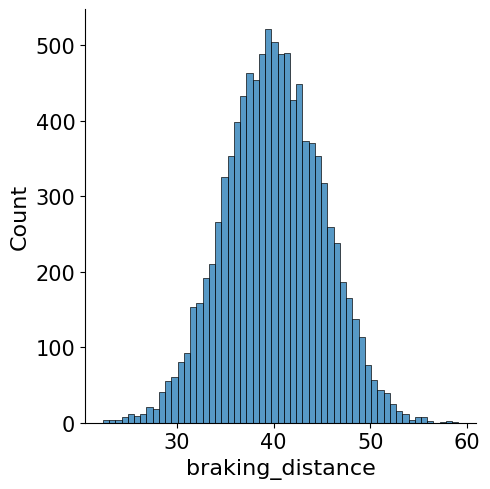

In [21]:
sns.displot(data["braking_distance"]);

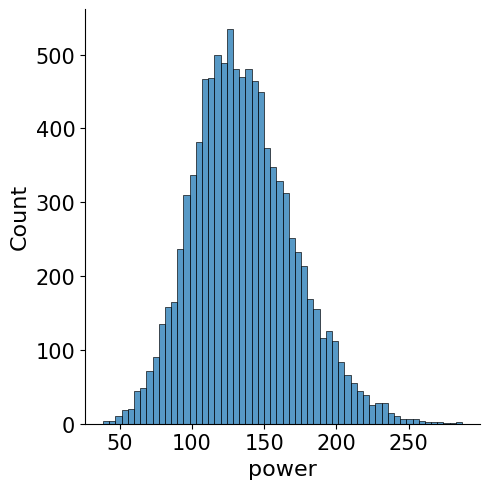

In [22]:
sns.displot(data["power"]);

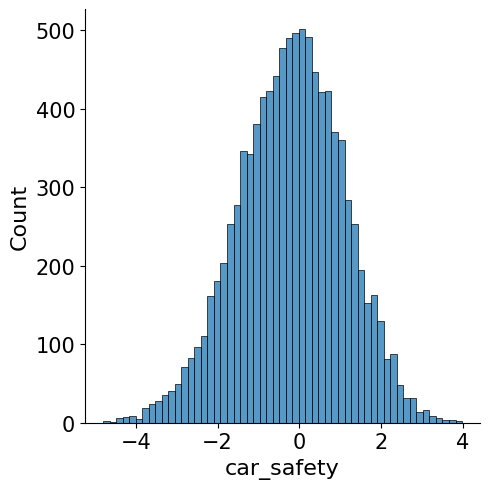

In [23]:
sns.displot(data["car_safety"]);

In [24]:
# sns.kdeplot?

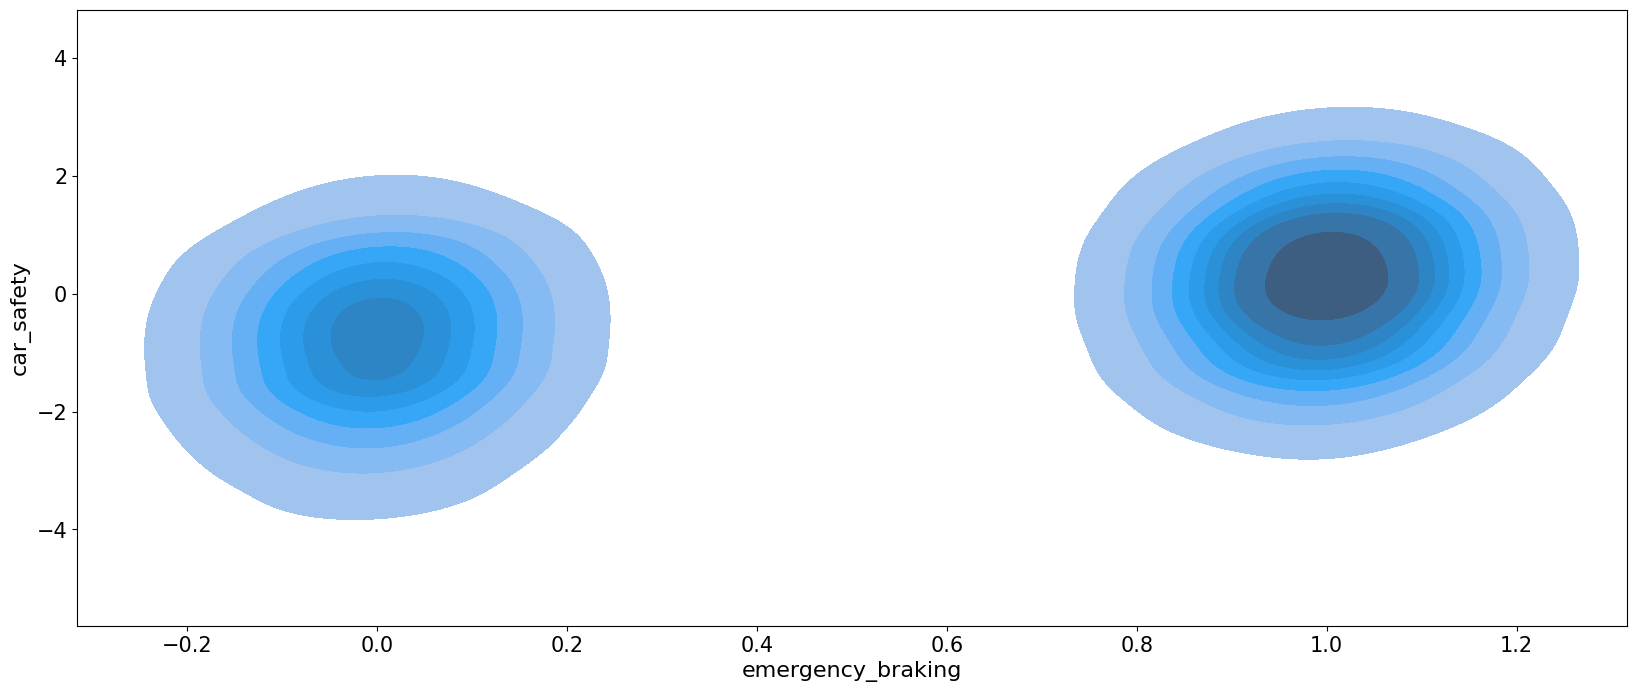

In [25]:
sns.kdeplot(
    x=data["emergency_braking"],
    y=data["car_safety"],
    fill=True
);

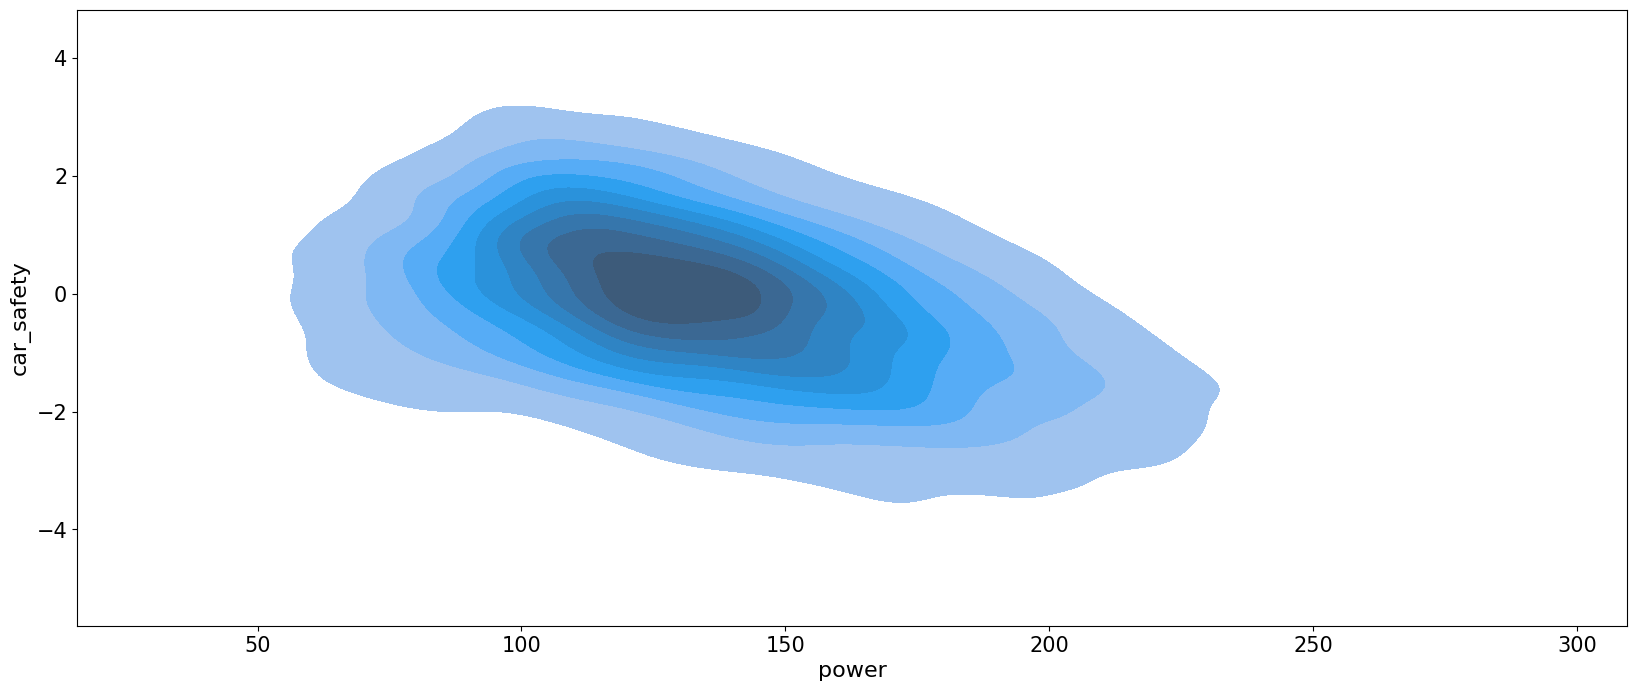

In [26]:
sns.kdeplot(
    x=data["power"],
    y=data["car_safety"],
    fill=True
);

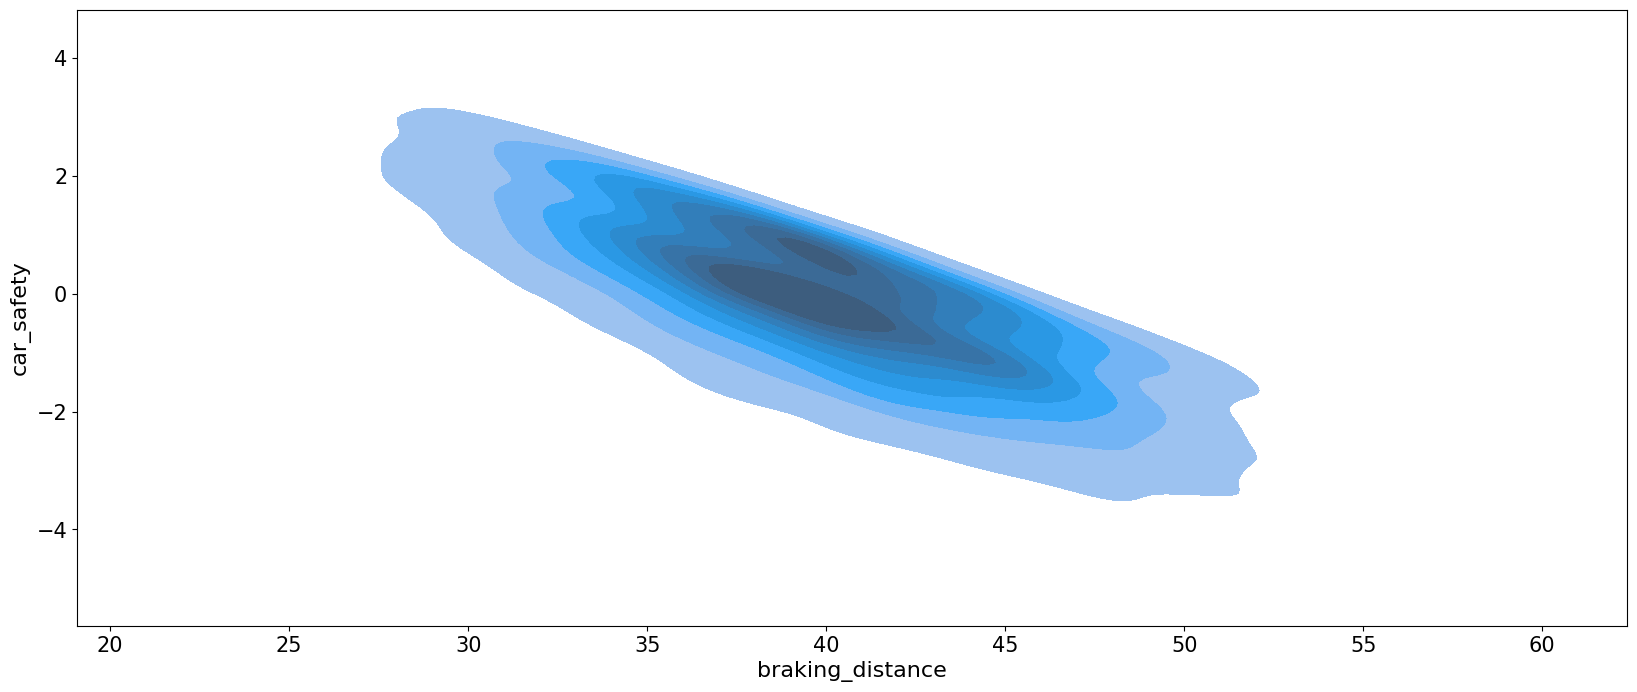

In [27]:
sns.kdeplot(
    x=data["braking_distance"],
    y=data["car_safety"],
    fill=True
);

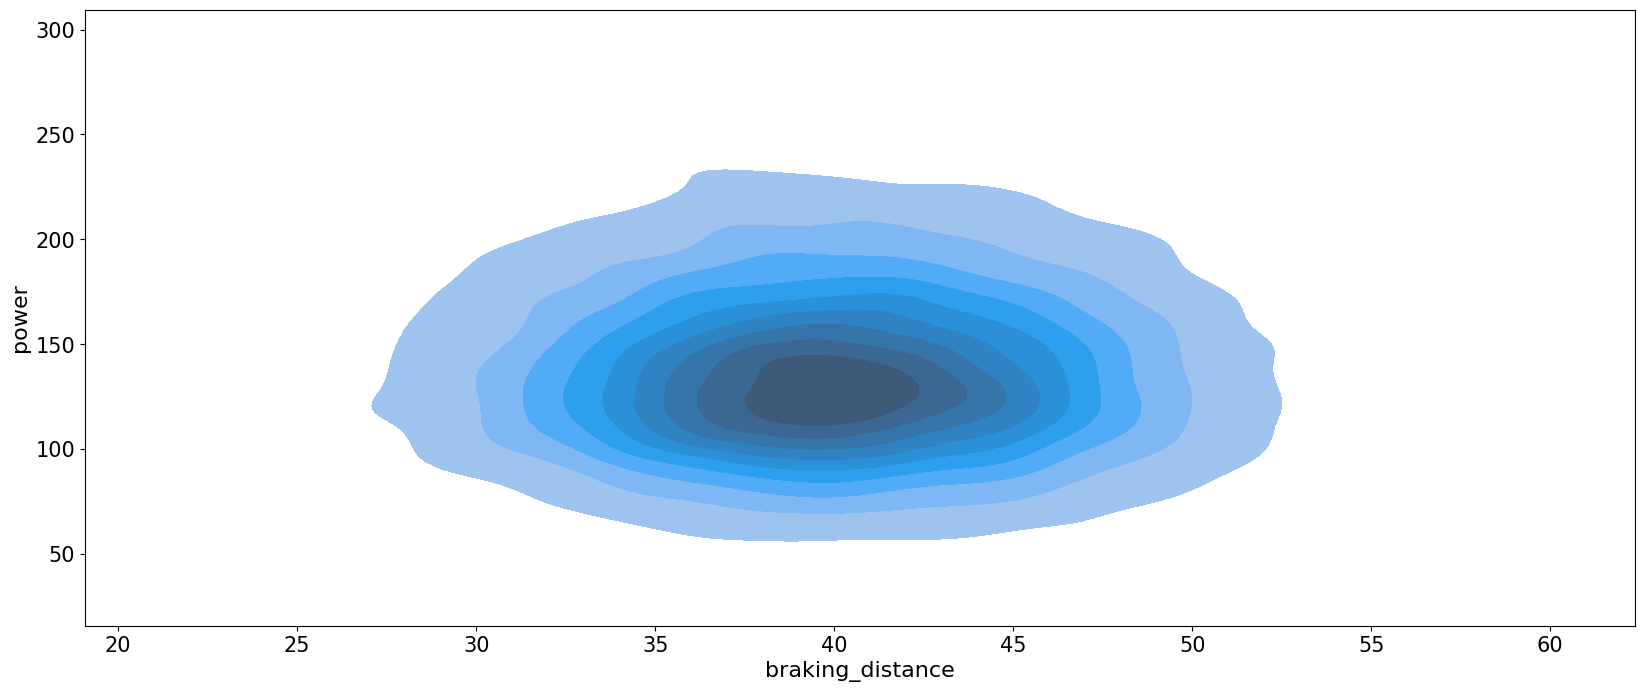

In [28]:
sns.kdeplot(
    x=data["braking_distance"],
    y=data["power"],
    fill=True
);

In [29]:
from scipy.stats import pearsonr


In [30]:
# pearsonr?

In [31]:
r, p_value = pearsonr(data['braking_distance'], data['power'])
# The p-value roughly indicates the probability of an uncorrelated system
# producing datasets that have a Pearson correlation at least as extreme as the one computed from these datasets.
r, p_value

(-0.0004050044960397909, 0.9676981835375327)

In [32]:
r, p_value = pearsonr(data['braking_distance'], data['car_safety'])
r, p_value

(-0.7906200067057424, 0.0)

In [33]:
r, p_value = pearsonr(data['power'], data['car_safety'])
r, p_value

(-0.4354681326482822, 0.0)

# Driver's ability

age distribution: https://www.destatis.de/DE/Themen/Gesellschaft-Umwelt/Bevoelkerung/Bevoelkerungsstand/Tabellen/bevoelkerung-altersgruppen-deutschland.html

(16, 100, 35.0293, 13.478013262717914, 10000)

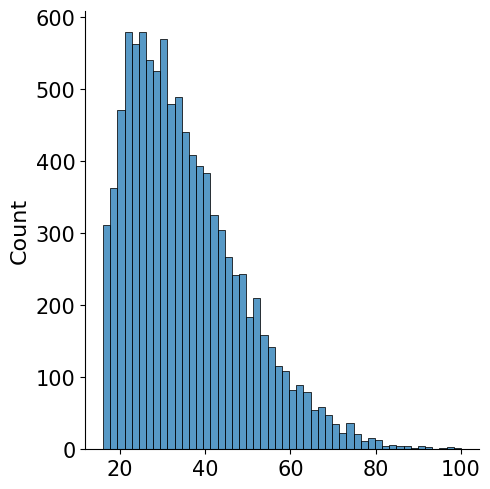

In [34]:
age_mean = 18
age_std = 22

x = skewnorm.rvs(a=8, loc=age_mean, scale=age_std, size=n_samples)
# hard clip leaves us with non constant amout of samples
# x = x[(x > 16) & (x < 100)] 
x = np.clip(x, a_min=16, a_max=100)
sns.displot(x);
x = x.astype(int)
age_skewed_mean = x.mean()
age_skewed_std = x.std()

x.min(), x.max(), age_skewed_mean, age_skewed_std, len(x)

In [35]:
driver_ability_model = StructuralCausalModel({
    "training": lambda n_samples: np.random.binomial(1, p=0.20, size=n_samples), 
    "age": lambda n_samples: skewnorm.rvs(a=16, loc=age_mean, scale=age_std, size=n_samples),
    "driver_ability": \
        lambda training, age, n_samples: 
            np.random.normal(loc=training - \
                             # all deviation from good age is negative
                             # using unskwed mean makes this a bit more balanaced
                             abs(age - age_skewed_mean) / age_std, \
                             scale=0.1)})

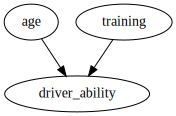

In [36]:
driver_ability_model.cgm.draw()

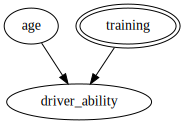

In [37]:
driver_ability_model_with_training = driver_ability_model.do("training")

driver_ability_model_with_training.cgm.draw()

In [38]:
driver_ability_model.cgm.get_distribution()

'P(training)P(age)P(driver_ability|training,age)'

In [39]:
n_samples=10_000
data = driver_ability_model.sample(n_samples=n_samples)
data.head()

training        age  driver_ability
0         1  31.418910        0.799222
1         0  21.222173       -0.595283
2         0  36.047867       -0.204366
3         0  29.023419       -0.299800
4         1  15.685315        0.134870

In [40]:
age = 80

In [41]:
# abs(age - age_skewed_mean) / age_skewed_std
# more balanced
abs(age - age_skewed_mean) / age_std

2.044122727272727

In [42]:
data.describe()

training           age  driver_ability
count  10000.000000  10000.000000    10000.000000
mean       0.200900     35.419488       -0.281631
std        0.400693     13.314372        0.546397
min        0.000000     14.077033       -2.873006
25%        0.000000     24.886666       -0.602214
50%        0.000000     32.640453       -0.326165
75%        0.000000     43.376879       -0.050883
max        1.000000     99.901581        1.192276

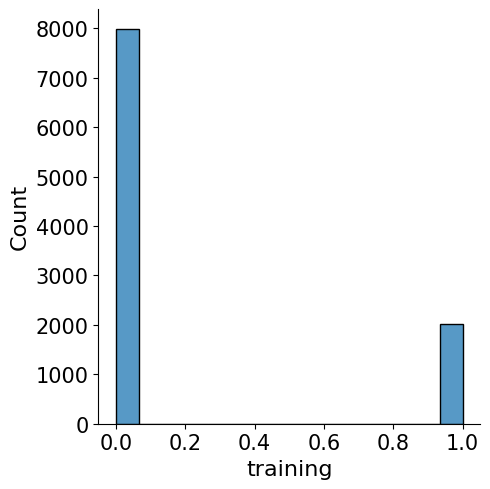

In [43]:
sns.displot(data["training"]);

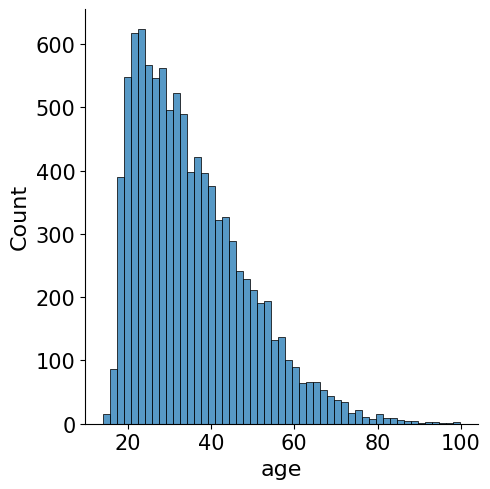

In [44]:
sns.displot(data["age"]);

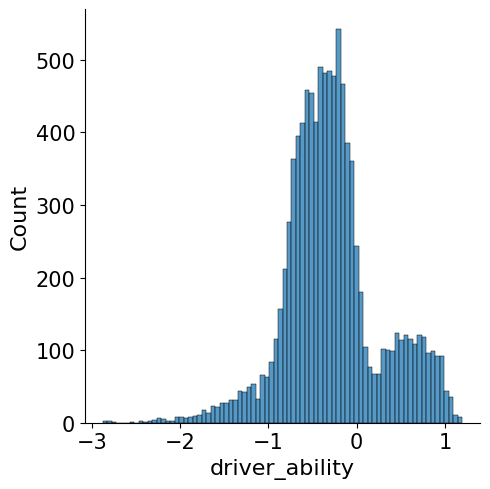

In [45]:
sns.displot(data["driver_ability"]);

In [46]:
# sns.kdeplot?

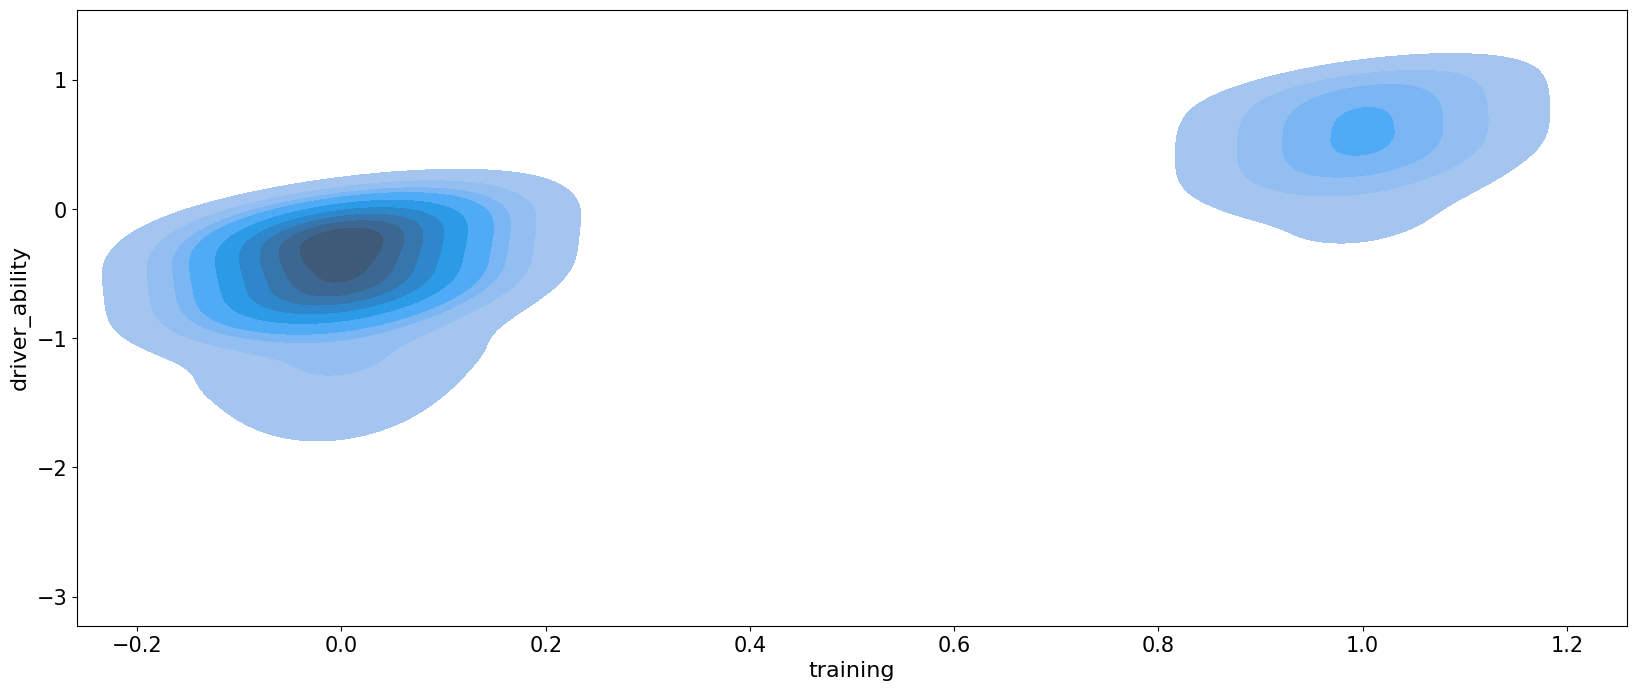

In [47]:
sns.kdeplot(
    x=data["training"],
    y=data["driver_ability"],
    fill=True
);

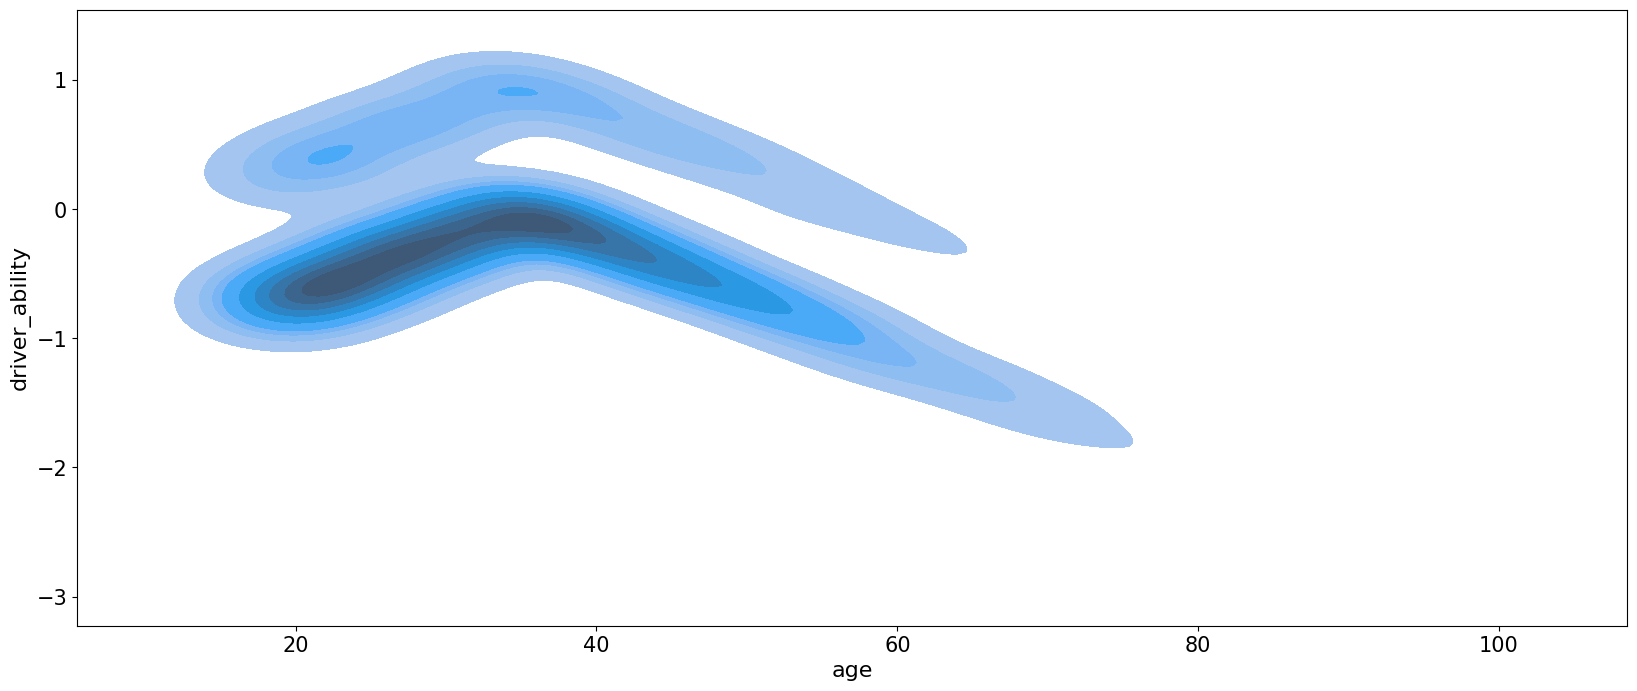

In [48]:
sns.kdeplot(
    x=data["age"],
    y=data["driver_ability"],
    fill=True
);

In [49]:
r, p_value = pearsonr(data['age'], data['driver_ability'])
r, p_value

(-0.3221847663467314, 2.873833543640925e-240)

In [50]:
r, p_value = pearsonr(data['training'], data['driver_ability'])
r, p_value

(0.7224950222261489, 0.0)

In [51]:
r, p_value = pearsonr(data['training'], data['age'])
r, p_value

(0.006772547692451244, 0.4982931051452392)

# Combined risk model

In [52]:
from sklearn.preprocessing import normalize

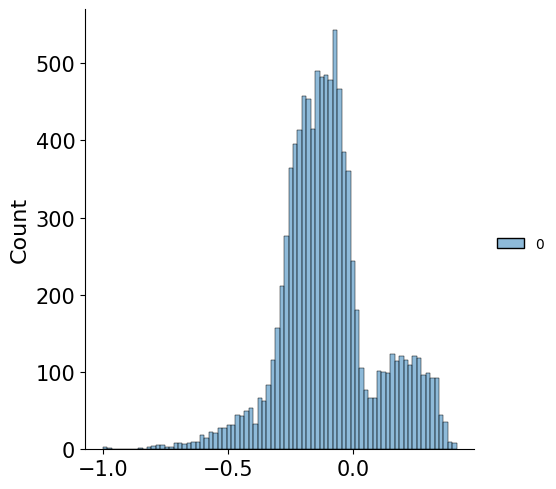

In [53]:
ability = normalize(data['driver_ability'].values.reshape(-1, 1), axis=0, norm='max')
sns.displot(ability);

(15.971339646919027, 220.79502239895504, 81.22994748186481, 25.26897253965623)

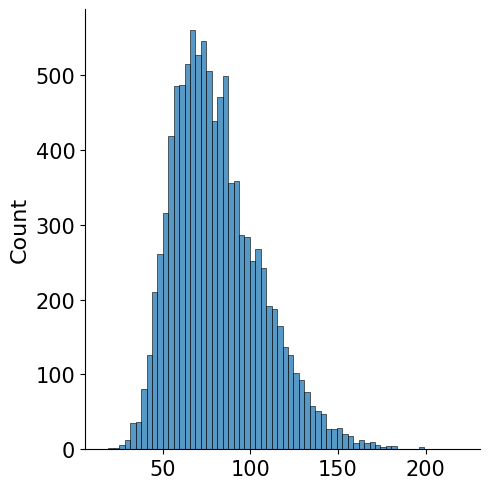

In [54]:
milage_mean = 50
milage_std = 40

x = skewnorm.rvs(a=4, loc=milage_mean, scale=milage_std, size=n_samples)
sns.displot(x);
milage_skewed_mean = x.mean()
milage_skewed_std = x.std()

x.min(), x.max(), milage_skewed_mean, milage_skewed_std

In [55]:
risk_model = StructuralCausalModel({
    "ability": lambda n_samples: driver_ability_model.sample(n_samples=n_samples)['driver_ability'], 
    "safety": lambda n_samples: car_safety_model.sample(n_samples=n_samples)['car_safety'],
    "milage": lambda n_samples: skewnorm.rvs(a=4, loc=milage_mean, scale=milage_std, size=n_samples),
    "risk": \
        lambda ability, safety, milage, n_samples:
                # negative score is high risk
             - np.random.normal(loc=ability + \
                             safety -
                             # all deviation from good milage is negative
                             abs(milage - milage_mean) / milage_std, \
                             scale=0.1)})

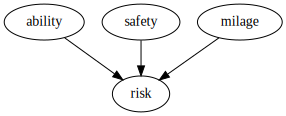

In [56]:
risk_model.cgm.draw()

In [57]:
n_samples=10_000
data = risk_model.sample(n_samples=n_samples)
data.head()

ability    safety     milage      risk
0 -0.882450  0.101919  89.632454  1.867799
1  0.811751 -0.111294  92.441982  0.364399
2 -0.105662  0.133509  69.536742  0.620608
3 -0.737810 -1.292333  72.559570  2.541500
4  0.530000  1.473222  76.304870 -1.246140

In [58]:
data.describe()

ability        safety        milage          risk
count  10000.000000  10000.000000  10000.000000  10000.000000
mean      -0.283749     -0.229191     80.834565      1.306763
std        0.549046      1.277359     25.139952      1.522487
min       -3.406155     -6.902543     16.767671     -3.836948
25%       -0.601958     -1.080858     62.276082      0.257125
50%       -0.330874     -0.198207     77.105652      1.285545
75%       -0.058356      0.655115     95.662521      2.321302
max        1.223698      3.716359    221.277298      8.705369

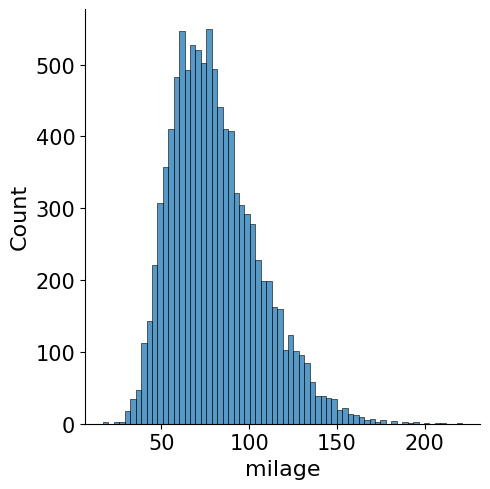

In [59]:
sns.displot(data["milage"]);

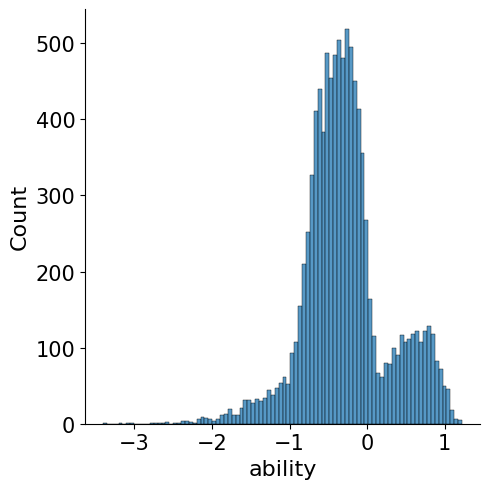

In [60]:
sns.displot(data["ability"]);

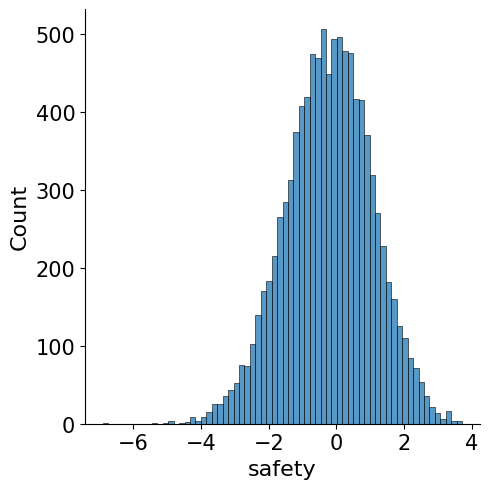

In [61]:
sns.displot(data["safety"]);

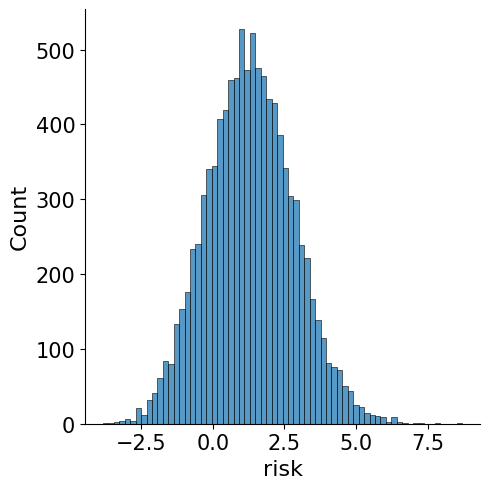

In [62]:
sns.displot(data["risk"]);

In [63]:
# sns.kdeplot?

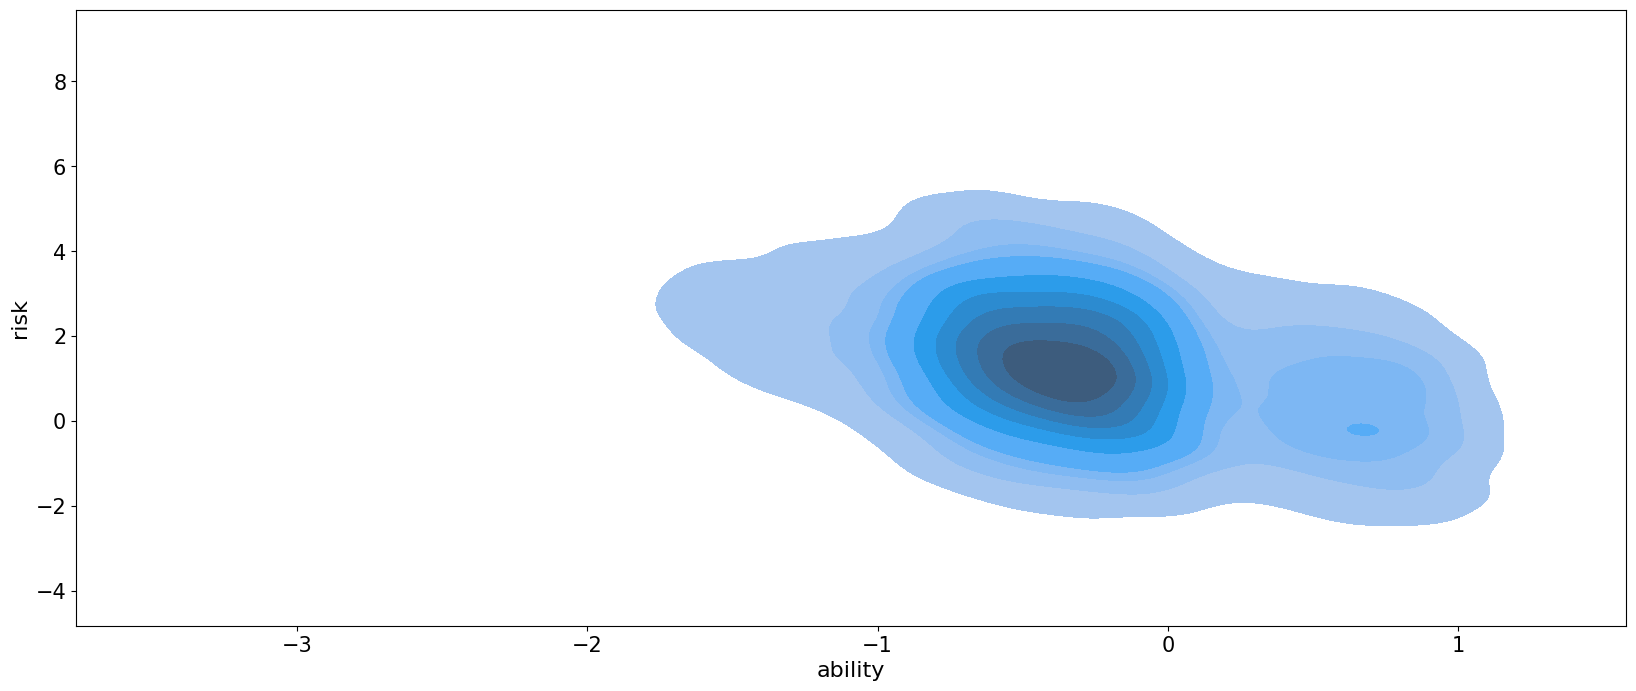

In [64]:
sns.kdeplot(
    x=data["ability"],
    y=data["risk"],
    fill=True
);

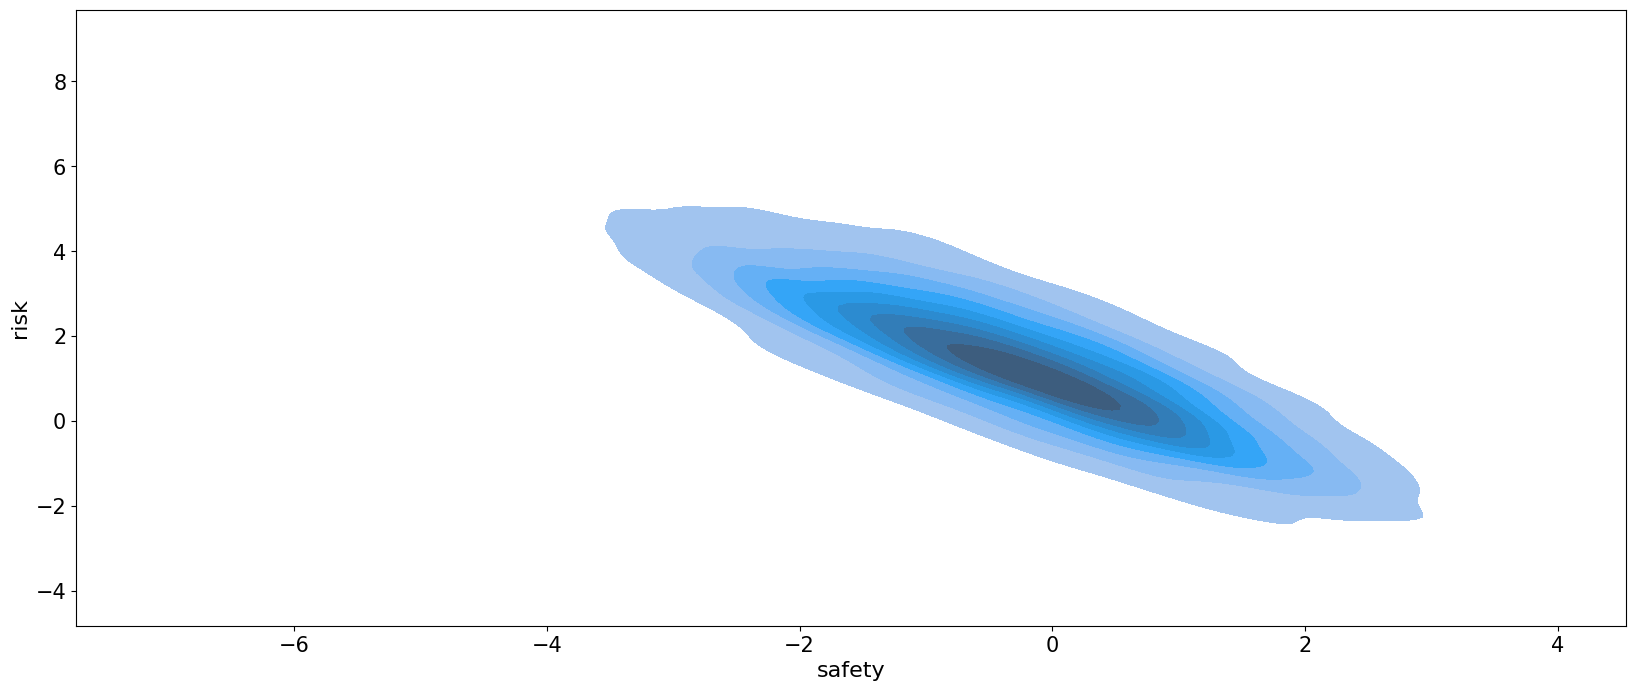

In [65]:
sns.kdeplot(
    x=data["safety"],
    y=data["risk"],
    fill=True
);

In [66]:
r, p_value = pearsonr(data['safety'], data['risk'])
r, p_value

(-0.8419000393965688, 0.0)

In [67]:
r, p_value = pearsonr(data['ability'], data['risk'])
r, p_value

(-0.36716844800418347, 8.92227e-317)

In [68]:
r, p_value = pearsonr(data['ability'], data['safety'])
r, p_value

(0.0036307365144223817, 0.7165828767460084)

# Decomposed combined

(16, 100, 35.0178, 13.275898582016962, 10000)

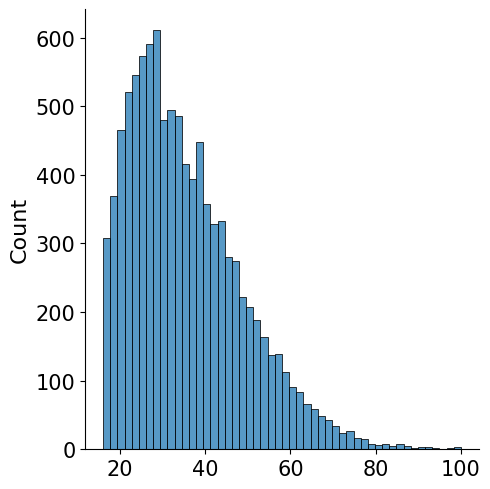

In [69]:
age_mean = 18
age_std = 22

x = skewnorm.rvs(a=8, loc=age_mean, scale=age_std, size=n_samples)
# hard clip leaves us with non constant amout of samples
# x = x[(x > 16) & (x < 100)] 
x = np.clip(x, a_min=16, a_max=100)
sns.displot(x);
x = x.astype(int)
age_skewed_mean = x.mean()
age_skewed_std = x.std()

x.min(), x.max(), age_skewed_mean, age_skewed_std, len(x)

In [70]:
# can be changed over time in favor of the car
# driver is overall more important than car
driver_weight = 4

risk_model = StructuralCausalModel({
    "training": lambda n_samples: np.random.binomial(1, p=0.20, size=n_samples), 
#     "age": lambda n_samples: np.clip(skewnorm.rvs(a=16, loc=age_mean, scale=age_std, size=n_samples), a_min=16, a_max=100).astype(int),
    "age": lambda n_samples: np.clip(skewnorm.rvs(a=16, loc=age_mean, scale=age_std, size=n_samples), a_min=16, a_max=100),
    "driver_ability": \
        lambda training, age, n_samples: 
            np.random.normal(loc=training - \
                             # all deviation from good age is negative
                             # using unskwed mean makes this a bit more balanaced
                             abs(age - age_skewed_mean) / age_std, \
                             scale=0.1),
    "emergency_braking": lambda n_samples: np.random.binomial(1, p=0.40, size=n_samples), 
    "braking_distance": lambda n_samples: np.random.normal(loc=braking_distance_mean, scale=braking_distance_std, size=n_samples),
    "power": lambda n_samples: skewnorm.rvs(a=2, loc=power_mean, scale=power_std, size=n_samples),
    "car_safety": \
        lambda emergency_braking, braking_distance, power, n_samples: \
            np.random.normal(loc=emergency_braking - \
                             # having a braking distance below average is negative, so we have to subtract
                             (braking_distance - braking_distance_mean) / braking_distance_std - \
                             # all deviation from good amount of power is negative
                             abs(power - power_mean) / power_std, \
                             scale=0.1),
    "milage": lambda n_samples: skewnorm.rvs(a=4, loc=milage_mean, scale=milage_std, size=n_samples),
    "risk": \
        lambda driver_ability, car_safety, milage, n_samples:
             # negative score is high risk
             - np.random.normal(loc=\
                             driver_ability * driver_weight\
                             + car_safety
                             # all deviation from good milage is negative
                             - abs(milage - milage_mean) / milage_std, \
                             scale=0.1)})

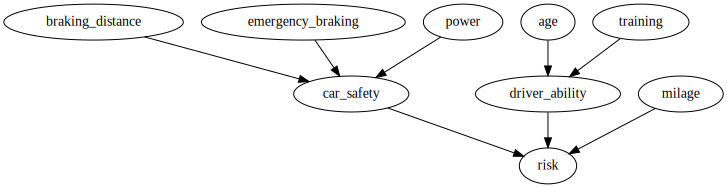

In [71]:
risk_model.cgm.draw()

In [72]:
# n_samples=10_000
n_samples=1_500
np.random.seed(42)
data = risk_model.sample(n_samples=n_samples)
data.head()

training        age  emergency_braking  braking_distance       power  \
0         0  74.493138                  1         38.264068  122.527184   
1         1  67.074261                  0         43.854011  115.367900   
2         0  47.691471                  0         34.730823  126.498658   
3         0  55.429717                  0         42.139072  125.629252   
4         0  41.088408                  1         31.490489  241.447458   

      milage  driver_ability  car_safety      risk  
0  55.990778       -1.754869    0.803182  6.292271  
1  92.431499       -0.421282   -0.958545  3.768941  
2  93.712797       -0.660386    0.670282  3.058975  
3  96.785658       -1.044535   -0.821925  6.255030  
4  75.892419       -0.247778   -0.077803  1.783070

In [73]:
data.describe()

training          age  emergency_braking  braking_distance  \
count  1500.000000  1500.000000        1500.000000       1500.000000   
mean      0.207333    35.243806           0.384667         39.728535   
std       0.405532    13.193059           0.486679          5.108156   
min       0.000000    16.000000           0.000000         25.502431   
25%       0.000000    24.971581           0.000000         36.261921   
50%       0.000000    32.511926           0.000000         39.697162   
75%       0.000000    43.043168           1.000000         43.284010   
max       1.000000    88.456666           1.000000         55.491497   

             power       milage  driver_ability   car_safety         risk  
count  1500.000000  1500.000000     1500.000000  1500.000000  1500.000000  
mean    137.524885    80.026726       -0.264821    -0.396552     2.225541  
std      36.527189    24.438771        0.544896     1.273974     2.575911  
min      31.956980    24.258544       -2.369260    -4.755363    -6.223990  
25%     112.369662    62.155913       -0.592163    -1.242621     0.575706  
50%     134.053456    76.716717       -0.311367    -0.377730     2.329790  
75%     160.117914    93.728268       -0.019770     0.495051     3.806629  
max     281.197004   180.794608        1.166650     3.637374    13.341089

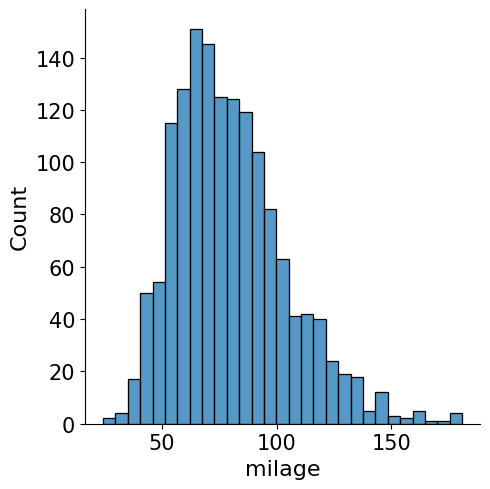

In [74]:
sns.displot(data["milage"]);

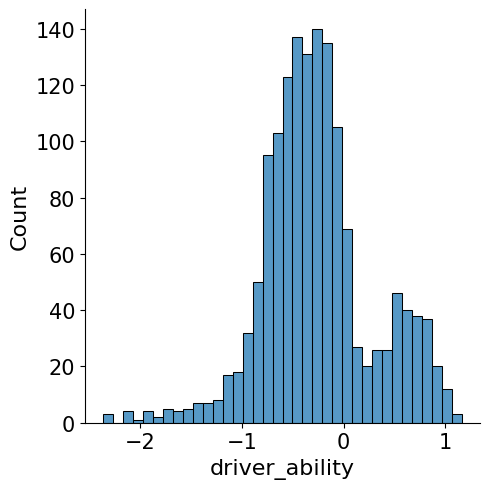

In [75]:
sns.displot(data["driver_ability"]);

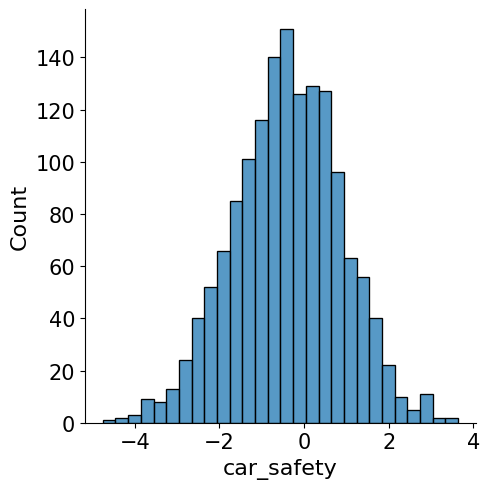

In [76]:
sns.displot(data["car_safety"]);

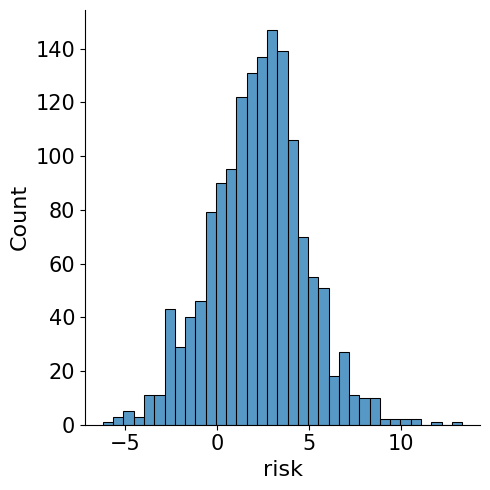

In [77]:
sns.displot(data["risk"]);

In [78]:
# sns.kdeplot?

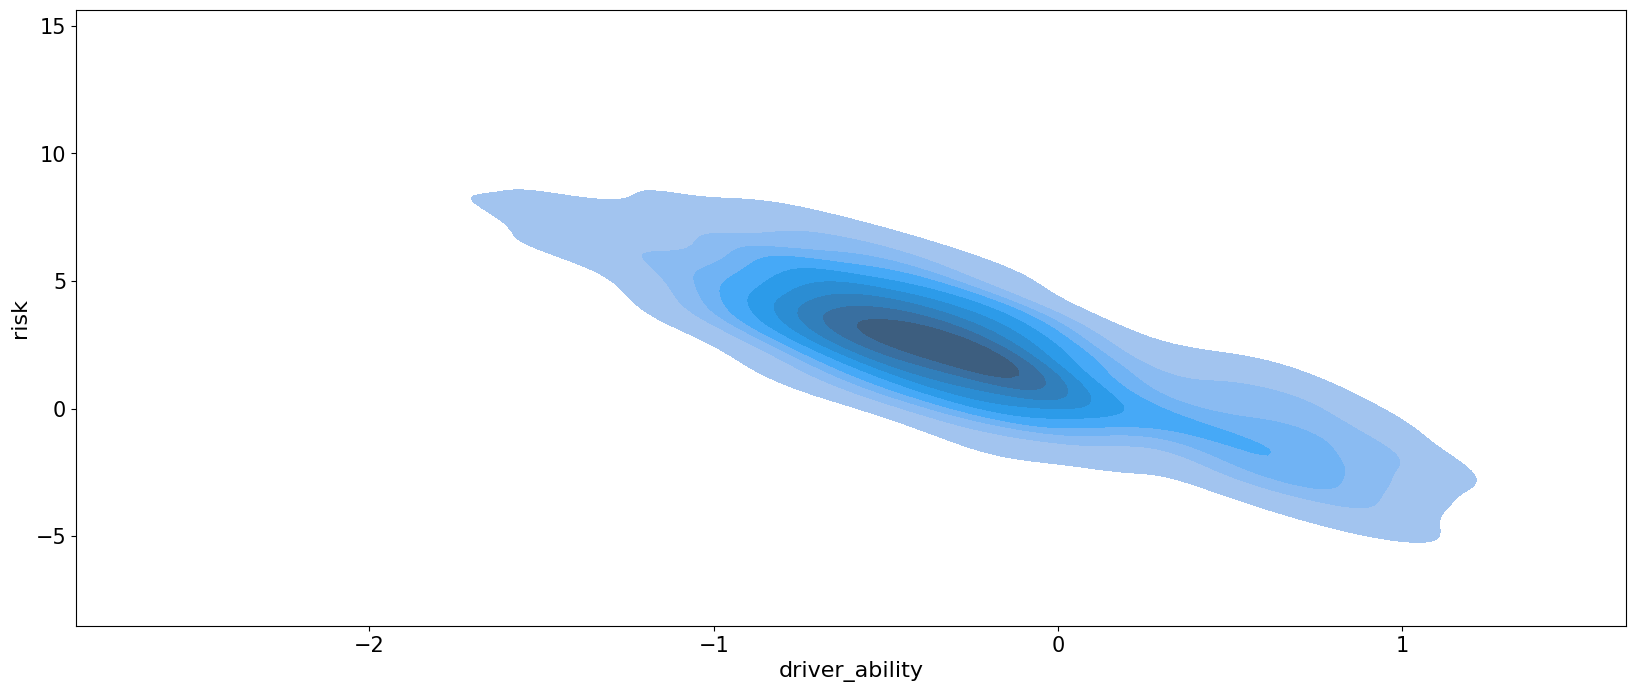

In [79]:
sns.kdeplot(
    x=data["driver_ability"],
    y=data["risk"],
    fill=True
);

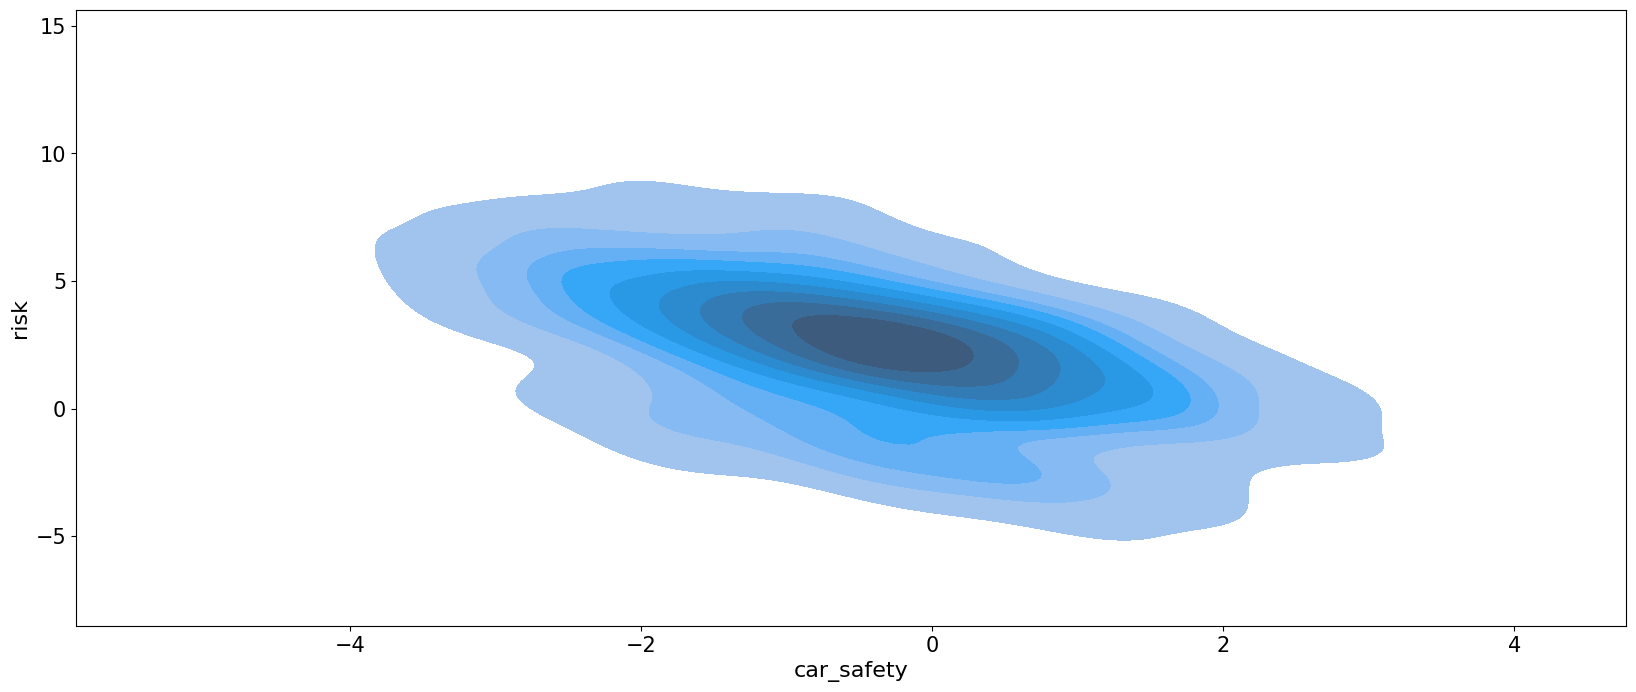

In [80]:
sns.kdeplot(
    x=data["car_safety"],
    y=data["risk"],
    fill=True
);

In [81]:
r, p_value = pearsonr(data['car_safety'], data['risk'])
r, p_value

(-0.49504135913859415, 1.4874261682773905e-93)

In [82]:
r, p_value = pearsonr(data['driver_ability'], data['risk'])
r, p_value

(-0.8362554261863254, 0.0)

In [83]:
r, p_value = pearsonr(data['driver_ability'], data['car_safety'])
r, p_value

(-0.0029189355956902884, 0.9100655293794181)

# Preparation of Dataset

In [84]:
data.head()

training        age  emergency_braking  braking_distance       power  \
0         0  74.493138                  1         38.264068  122.527184   
1         1  67.074261                  0         43.854011  115.367900   
2         0  47.691471                  0         34.730823  126.498658   
3         0  55.429717                  0         42.139072  125.629252   
4         0  41.088408                  1         31.490489  241.447458   

      milage  driver_ability  car_safety      risk  
0  55.990778       -1.754869    0.803182  6.292271  
1  92.431499       -0.421282   -0.958545  3.768941  
2  93.712797       -0.660386    0.670282  3.058975  
3  96.785658       -1.044535   -0.821925  6.255030  
4  75.892419       -0.247778   -0.077803  1.783070

In [85]:
GREEN = 2
YELLOW = 1
RED = 0

In [86]:
features = ['training', 'age', 'emergency_braking', 'braking_distance', 'power', 'milage', 'risk']

In [87]:
# preprocessed_data = data[['driver_ability', 'car_safety', 'milage', 'risk']]
preprocessed_data = data[features]
# preprocessed_data = data.copy()
preprocessed_data['risk'] = normalize(preprocessed_data['risk'].values.reshape(-1, 1), axis=0, norm='max')
preprocessed_data['group_name'] = 'medium'
preprocessed_data['group'] = YELLOW
preprocessed_data.head()

training        age  emergency_braking  braking_distance       power  \
0         0  74.493138                  1         38.264068  122.527184   
1         1  67.074261                  0         43.854011  115.367900   
2         0  47.691471                  0         34.730823  126.498658   
3         0  55.429717                  0         42.139072  125.629252   
4         0  41.088408                  1         31.490489  241.447458   

      milage      risk group_name  group  
0  55.990778  0.471646     medium      1  
1  92.431499  0.282506     medium      1  
2  93.712797  0.229290     medium      1  
3  96.785658  0.468855     medium      1  
4  75.892419  0.133653     medium      1

In [88]:
preprocessed_data.describe()

training          age  emergency_braking  braking_distance  \
count  1500.000000  1500.000000        1500.000000       1500.000000   
mean      0.207333    35.243806           0.384667         39.728535   
std       0.405532    13.193059           0.486679          5.108156   
min       0.000000    16.000000           0.000000         25.502431   
25%       0.000000    24.971581           0.000000         36.261921   
50%       0.000000    32.511926           0.000000         39.697162   
75%       0.000000    43.043168           1.000000         43.284010   
max       1.000000    88.456666           1.000000         55.491497   

             power       milage         risk   group  
count  1500.000000  1500.000000  1500.000000  1500.0  
mean    137.524885    80.026726     0.166819     1.0  
std      36.527189    24.438771     0.193081     0.0  
min      31.956980    24.258544    -0.466528     1.0  
25%     112.369662    62.155913     0.043153     1.0  
50%     134.053456    76.716717     0.174633     1.0  
75%     160.117914    93.728268     0.285331     1.0  
max     281.197004   180.794608     1.000000     1.0

In [89]:
# balanced? imbalanced?
low_risk_threshold = preprocessed_data['risk'].quantile(.45)
# low_risk_threshold = preprocessed_data['risk'].quantile(.4)
# low_risk_threshold = preprocessed_data['risk'].quantile(.35)
# low_risk_threshold = preprocessed_data['risk'].quantile(.3333)
# low_risk_threshold = preprocessed_data['risk'].quantile(.50)
low_risk_threshold

0.14986365738549853

In [90]:
# high_risk_threshold = preprocessed_data['risk'].quantile(.6)
# high_risk_threshold = preprocessed_data['risk'].quantile(.65)
# high_risk_threshold = preprocessed_data['risk'].quantile(.6666)
high_risk_threshold = preprocessed_data['risk'].quantile(.55)
# high_risk_threshold = preprocessed_data['risk'].quantile(.75)
high_risk_threshold

0.19733918688710375

In [91]:
binary_risk_threshold = preprocessed_data['risk'].quantile(.5)
preprocessed_data['good_customer'] = np.where(preprocessed_data['risk'] <= binary_risk_threshold, 1, 0)
np.unique(preprocessed_data['good_customer'], return_counts=True)

(array([0, 1]), array([750, 750]))

In [92]:
preprocessed_data['group_name'] = np.where(preprocessed_data['risk'] < low_risk_threshold, 'low', preprocessed_data['group_name'])

In [93]:
preprocessed_data['group_name'] = np.where(preprocessed_data['risk'] > high_risk_threshold, 'high', preprocessed_data['group_name'])

In [94]:
np.unique(preprocessed_data['group_name'], return_counts=True)

(array(['high', 'low', 'medium'], dtype=object), array([675, 675, 150]))

In [95]:
preprocessed_data['group'] = np.where(preprocessed_data['group_name'] == 'low', GREEN, preprocessed_data['group'])

In [96]:
preprocessed_data['group'] = np.where(preprocessed_data['group_name'] == 'high', RED, preprocessed_data['group'])

In [97]:
preprocessed_data.head(10)

training        age  emergency_braking  braking_distance       power  \
0         0  74.493138                  1         38.264068  122.527184   
1         1  67.074261                  0         43.854011  115.367900   
2         0  47.691471                  0         34.730823  126.498658   
3         0  55.429717                  0         42.139072  125.629252   
4         0  41.088408                  1         31.490489  241.447458   
5         0  69.693872                  0         37.193310  167.797457   
6         0  49.558664                  0         38.352553  164.678203   
7         1  28.690422                  0         48.374298  126.981076   
8         0  31.817048                  0         38.625988   95.699767   
9         0  37.597146                  1         28.993783  128.365608   

      milage      risk group_name  group  good_customer  
0  55.990778  0.471646       high      0              0  
1  92.431499  0.282506       high      0              0  
2  93.712797  0.229290       high      0              0  
3  96.785658  0.468855       high      0              0  
4  75.892419  0.133653        low      2              1  
5  98.267345  0.592297       high      0              0  
6  65.638725  0.236539       high      0              0  
7  63.689887 -0.027660        low      2              1  
8  57.765999 -0.000576        low      2              1  
9  72.779806 -0.082581        low      2              1

In [98]:
preprocessed_data.describe()

training          age  emergency_braking  braking_distance  \
count  1500.000000  1500.000000        1500.000000       1500.000000   
mean      0.207333    35.243806           0.384667         39.728535   
std       0.405532    13.193059           0.486679          5.108156   
min       0.000000    16.000000           0.000000         25.502431   
25%       0.000000    24.971581           0.000000         36.261921   
50%       0.000000    32.511926           0.000000         39.697162   
75%       0.000000    43.043168           1.000000         43.284010   
max       1.000000    88.456666           1.000000         55.491497   

             power       milage         risk     group  good_customer  
count  1500.000000  1500.000000  1500.000000  1500.000    1500.000000  
mean    137.524885    80.026726     0.166819     1.000       0.500000  
std      36.527189    24.438771     0.193081     0.949       0.500167  
min      31.956980    24.258544    -0.466528     0.000       0.000000  
25%     112.369662    62.155913     0.043153     0.000       0.000000  
50%     134.053456    76.716717     0.174633     1.000       0.500000  
75%     160.117914    93.728268     0.285331     2.000       1.000000  
max     281.197004   180.794608     1.000000     2.000       1.000000

In [99]:
labels = ["High Risk", "Medium Risk", "Low Risk"]
markers = ['v', 'd', '^']
# colors = ['#FF8080', '#FFFF80', '#8080FF']
colors = ['#FF0000', '#FFFF00', '#0000FF']

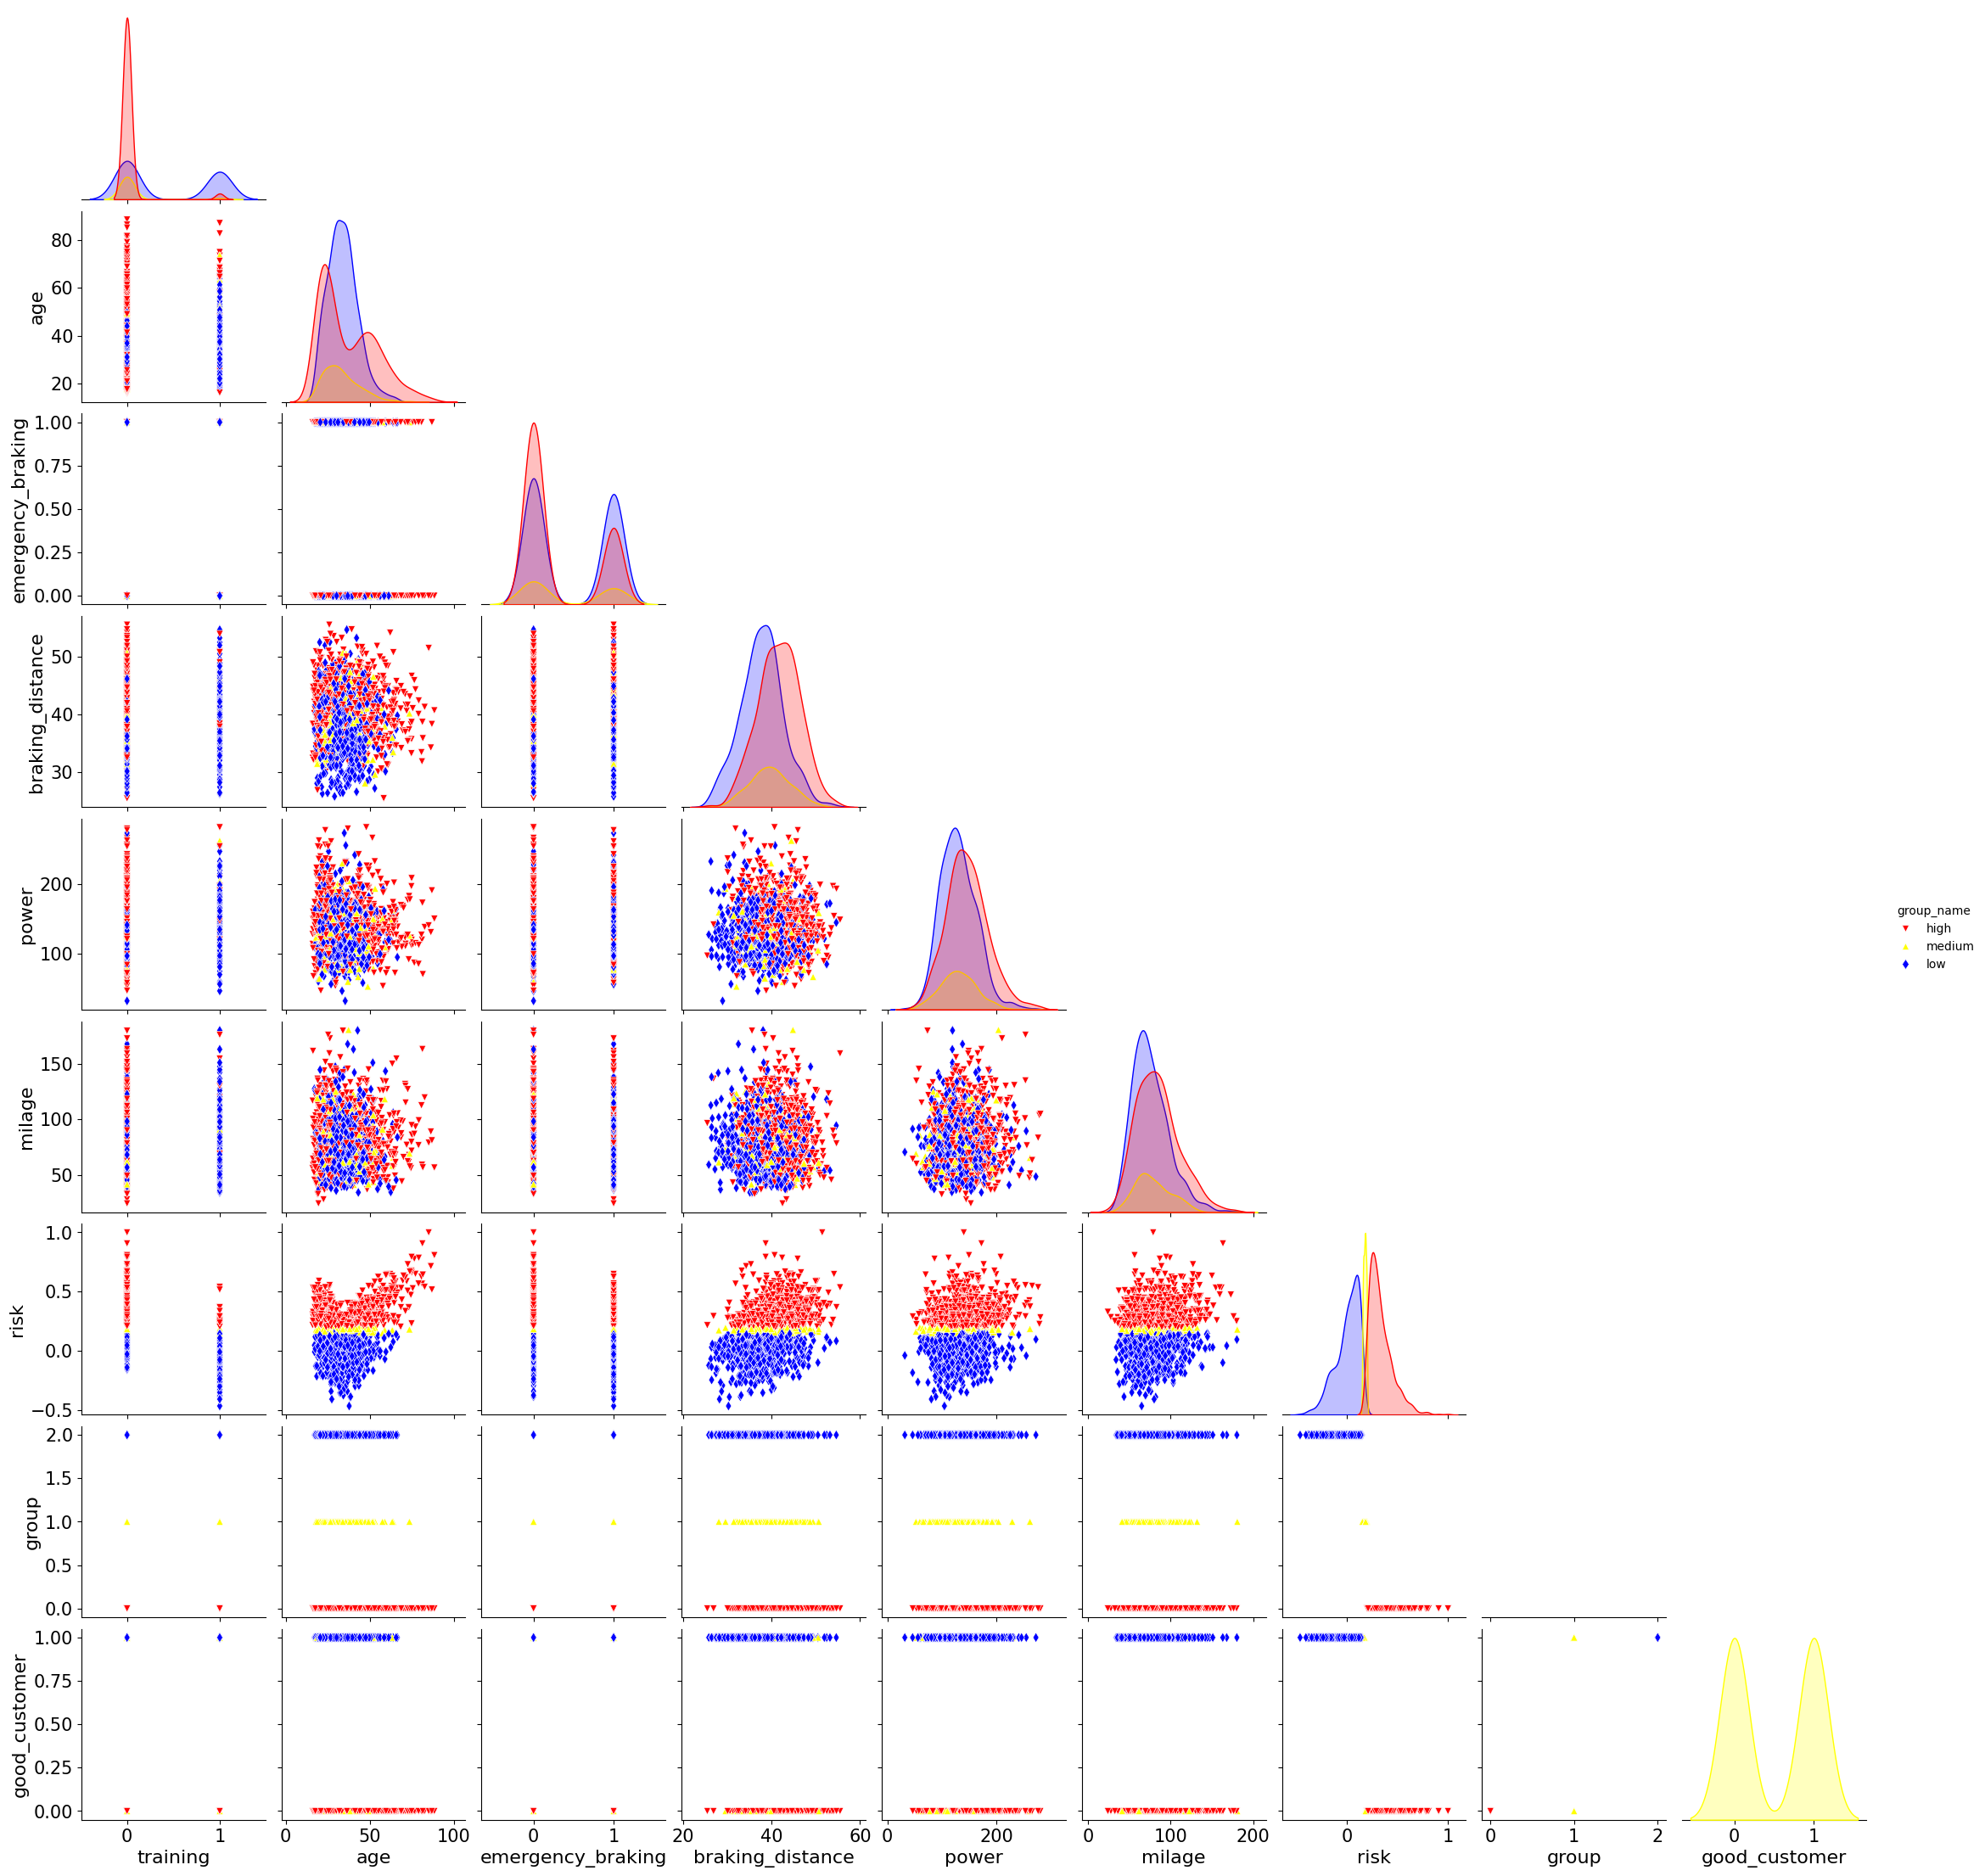

In [100]:
# https://seaborn.pydata.org/generated/seaborn.pairplot.html

# sns.pairplot(preprocessed_data, hue='group',  kind="kde";
 
sns.pairplot(preprocessed_data, 
             kind="scatter", 
             diag_kind="kde",
             corner=True, 
             hue='group_name',
             hue_order = ['high', 'medium', 'low'],
             palette=colors, 
             markers=markers);


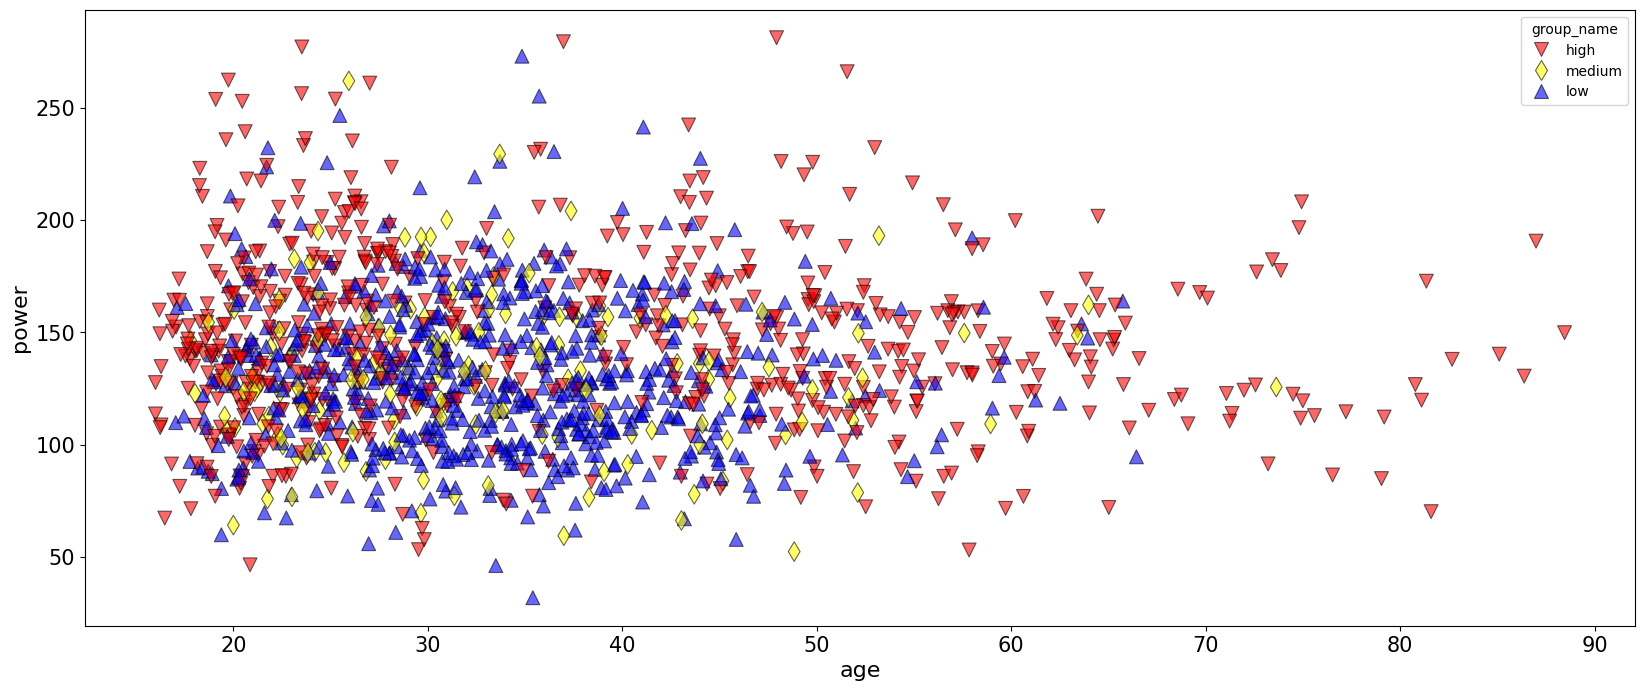

In [101]:
sns.scatterplot(x=preprocessed_data['age'], 
                y=preprocessed_data['power'], 
                hue=preprocessed_data['group_name'], 
                hue_order = ['high', 'medium', 'low'],
                palette=colors,  
                style=preprocessed_data['group_name'],
                style_order = ['high', 'medium', 'low'],
                markers=markers,
                s=100,
                edgecolor='k',
                alpha=0.6
               );

In [102]:
file_name = './model-based-1.csv'
preprocessed_data.to_csv(file_name, index=False, sep=';')

In [103]:
!ls

generate-causal.ipynb  month-16.csv.gz	month-25.csv.gz  month-34.csv.gz
insurance_prediction   month-17.csv.gz	month-26.csv.gz  month-35.csv.gz
model-based-1.csv      month-18.csv.gz	month-27.csv.gz  month-36.csv.gz
month-1.csv.gz	       month-19.csv.gz	month-28.csv.gz  month-4.csv.gz
month-10.csv.gz        month-2.csv.gz	month-29.csv.gz  month-5.csv.gz
month-11.csv.gz        month-20.csv.gz	month-3.csv.gz	 month-6.csv.gz
month-12.csv.gz        month-21.csv.gz	month-30.csv.gz  month-7.csv.gz
month-13.csv.gz        month-22.csv.gz	month-31.csv.gz  month-8.csv.gz
month-14.csv.gz        month-23.csv.gz	month-32.csv.gz  month-9.csv.gz
month-15.csv.gz        month-24.csv.gz	month-33.csv.gz  reference.csv.gz


In [104]:
customers = pd.read_csv(file_name, sep=';')
customers.describe()

training          age  emergency_braking  braking_distance  \
count  1500.000000  1500.000000        1500.000000       1500.000000   
mean      0.207333    35.243806           0.384667         39.728535   
std       0.405532    13.193059           0.486679          5.108156   
min       0.000000    16.000000           0.000000         25.502431   
25%       0.000000    24.971581           0.000000         36.261921   
50%       0.000000    32.511926           0.000000         39.697162   
75%       0.000000    43.043168           1.000000         43.284010   
max       1.000000    88.456666           1.000000         55.491497   

             power       milage         risk     group  good_customer  
count  1500.000000  1500.000000  1500.000000  1500.000    1500.000000  
mean    137.524885    80.026726     0.166819     1.000       0.500000  
std      36.527189    24.438771     0.193081     0.949       0.500167  
min      31.956980    24.258544    -0.466528     0.000       0.000000  
25%     112.369662    62.155913     0.043153     0.000       0.000000  
50%     134.053456    76.716717     0.174633     1.000       0.500000  
75%     160.117914    93.728268     0.285331     2.000       1.000000  
max     281.197004   180.794608     1.000000     2.000       1.000000

# Story: Assistant systems get more and more important, bringing down weight on driver ability and bringing up braking systems over time 
* influence on driver ability can not be measured in input
* but inputs like age and assistant system

In [105]:
def generate_risk_data(driver_weight = 4.0, 
                       emergency_braking_fraction = 0.40,
                       age_drift = 0,
                       milage_drift = 0,
                       n_samples=1_500, 
                       seed=42,
#                        apply_norm=True,
                       apply_norm=False,
                       low_risk_threshold = 1.0,
                       high_risk_threshold = 3.0,
                       good_customer_threshold = 2.0,
                      low_risk_quantile=.3333,
                      high_risk_quantile=.6666):
    risk_model = StructuralCausalModel({
        "training": lambda n_samples: np.random.binomial(1, p=0.20, size=n_samples), 
    #     "age": lambda n_samples: np.clip(skewnorm.rvs(a=16, loc=age_mean, scale=age_std, size=n_samples), a_min=16, a_max=100).astype(int),
        "age": lambda n_samples: np.clip(skewnorm.rvs(a=16, loc=age_mean, scale=age_std, size=n_samples), a_min=16, a_max=100) \
            + np.random.normal(age_drift, scale=0.1, size=n_samples),
        "driver_ability": \
            lambda training, age, n_samples: 
                np.random.normal(loc=training - \
                                 # all deviation from good age is negative
                                 # using unskwed mean makes this a bit more balanaced
                                 abs(age - age_skewed_mean) / age_std, \
                                 scale=0.1),
        "emergency_braking": lambda n_samples: np.random.binomial(1, p=emergency_braking_fraction, size=n_samples), 
        "braking_distance": lambda n_samples: np.random.normal(loc=braking_distance_mean, scale=braking_distance_std, size=n_samples),
        "power": lambda n_samples: skewnorm.rvs(a=2, loc=power_mean, scale=power_std, size=n_samples),
        "car_safety": \
            lambda emergency_braking, braking_distance, power, n_samples: \
                np.random.normal(loc=emergency_braking - \
                                 # having a braking distance below average is negative, so we have to subtract
                                 (braking_distance - braking_distance_mean) / braking_distance_std - \
                                 # all deviation from good amount of power is negative
                                 abs(power - power_mean) / power_std, \
                                 scale=0.1),
        "milage": lambda n_samples: np.clip(skewnorm.rvs(a=4, loc=milage_mean, scale=milage_std, size=n_samples) \
            + np.random.normal(milage_drift, scale=1, size=n_samples), a_min=5, a_max=None),
        "risk": \
            lambda driver_ability, car_safety, milage, n_samples:
                    # negative score is high risk
                    # driver is overall more important than car
                 - np.random.normal(loc=\
                                 driver_ability * driver_weight\
                                 + car_safety
                                 # all deviation from good milage is negative
                                 - abs(milage - milage_mean) / milage_std, \
                                 scale=0.1)})
    np.random.seed(seed)
    data = risk_model.sample(n_samples=n_samples)
    
    preprocessed_data = data[features]
    # preprocessed_data = data.copy()
    if apply_norm:
        preprocessed_data['risk'] = normalize(preprocessed_data['risk'].values.reshape(-1, 1), axis=0, norm='max')
    preprocessed_data['group_name'] = 'medium'
    preprocessed_data['group'] = YELLOW
    
    if low_risk_threshold is None:
        low_risk_threshold = preprocessed_data['risk'].quantile(low_risk_quantile)
        high_risk_threshold = preprocessed_data['risk'].quantile(high_risk_quantile)

    preprocessed_data['good_customer'] = np.where(preprocessed_data['risk'] <= good_customer_threshold, 1, 0)

    preprocessed_data['group_name'] = np.where(preprocessed_data['risk'] < low_risk_threshold, 'low', preprocessed_data['group_name'])
    preprocessed_data['group_name'] = np.where(preprocessed_data['risk'] > high_risk_threshold, 'high', preprocessed_data['group_name'])

    preprocessed_data['group'] = np.where(preprocessed_data['group_name'] == 'low', GREEN, preprocessed_data['group'])
    preprocessed_data['group'] = np.where(preprocessed_data['group_name'] == 'high', RED, preprocessed_data['group'])
    
    return preprocessed_data


In [106]:
generated_data = generate_risk_data()
generated_data.describe()

training          age  emergency_braking  braking_distance  \
count  1500.000000  1500.000000        1500.000000       1500.000000   
mean      0.207333    35.240226           0.370000         40.047327   
std       0.405532    13.191571           0.482965          5.292310   
min       0.000000    16.019190           0.000000         20.816722   
25%       0.000000    24.948022           0.000000         36.440032   
50%       0.000000    32.462481           0.000000         39.922413   
75%       0.000000    43.078459           1.000000         43.675832   
max       1.000000    88.425701           1.000000         57.645276   

             power       milage         risk        group  good_customer  
count  1500.000000  1500.000000  1500.000000  1500.000000    1500.000000  
mean    134.393736    80.415974     2.247416     0.909333       0.446667  
std      33.410677    25.536882     2.624168     0.823953       0.497313  
min      45.272791    27.414000    -6.895280     0.000000       0.000000  
25%     110.333073    61.828411     0.602794     0.000000       0.000000  
50%     132.423028    76.275210     2.346631     1.000000       0.000000  
75%     155.296864    95.114365     3.918869     2.000000       1.000000  
max     257.983238   183.970662    12.291869     2.000000       1.000000

In [107]:
np.unique(generated_data['good_customer'], return_counts=True)


(array([0, 1]), array([830, 670]))

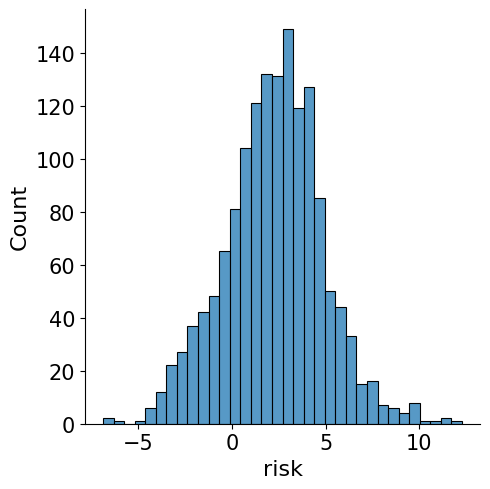

In [108]:
sns.displot(generated_data["risk"]);

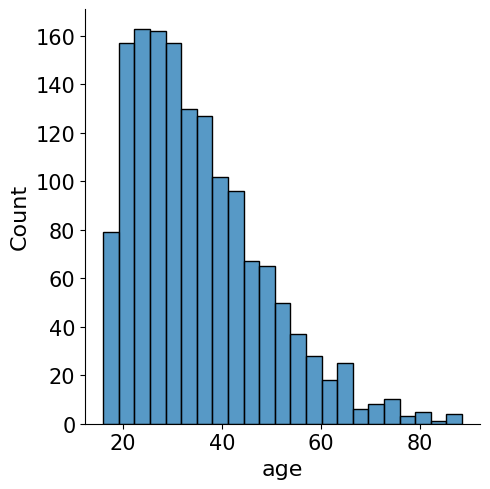

In [109]:
sns.displot(generated_data["age"]);

In [110]:
np.unique(generated_data['group_name'], return_counts=True)

(array(['high', 'low', 'medium'], dtype=object), array([583, 447, 470]))

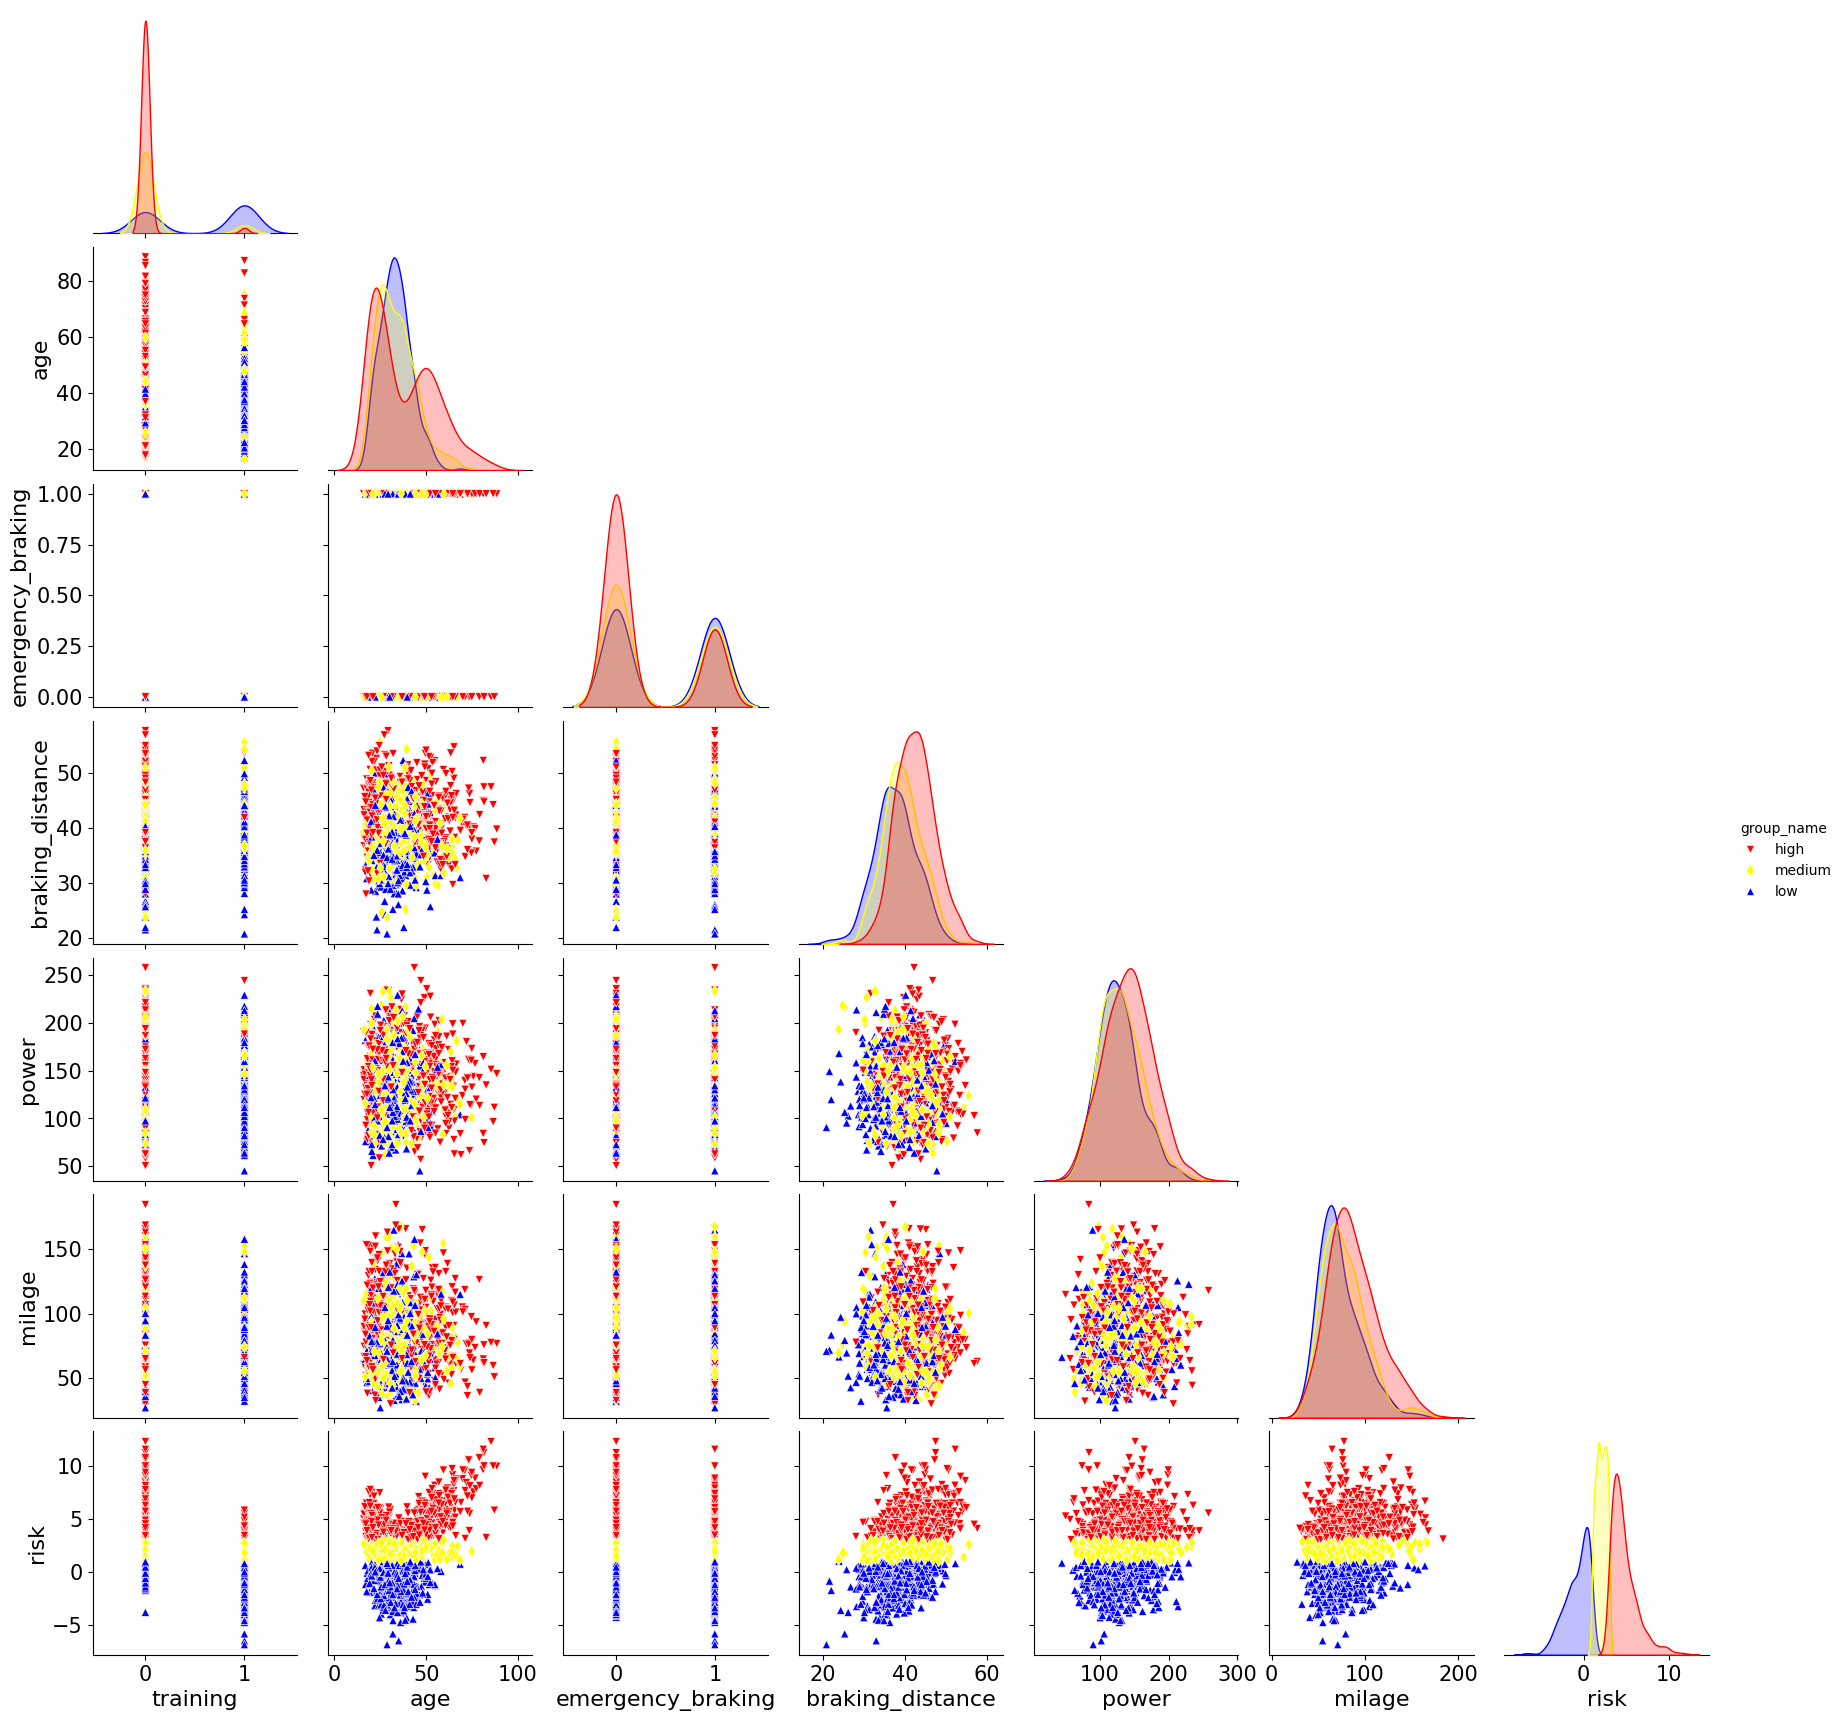

In [111]:
sns.pairplot(generated_data, 
             kind="scatter", 
             diag_kind="kde",
             corner=True, 
             hue='group_name',
             hue_order = ['high', 'medium', 'low'],
             palette=colors, 
             markers=markers,
             vars=features);

In [112]:
# sns.scatterplot?

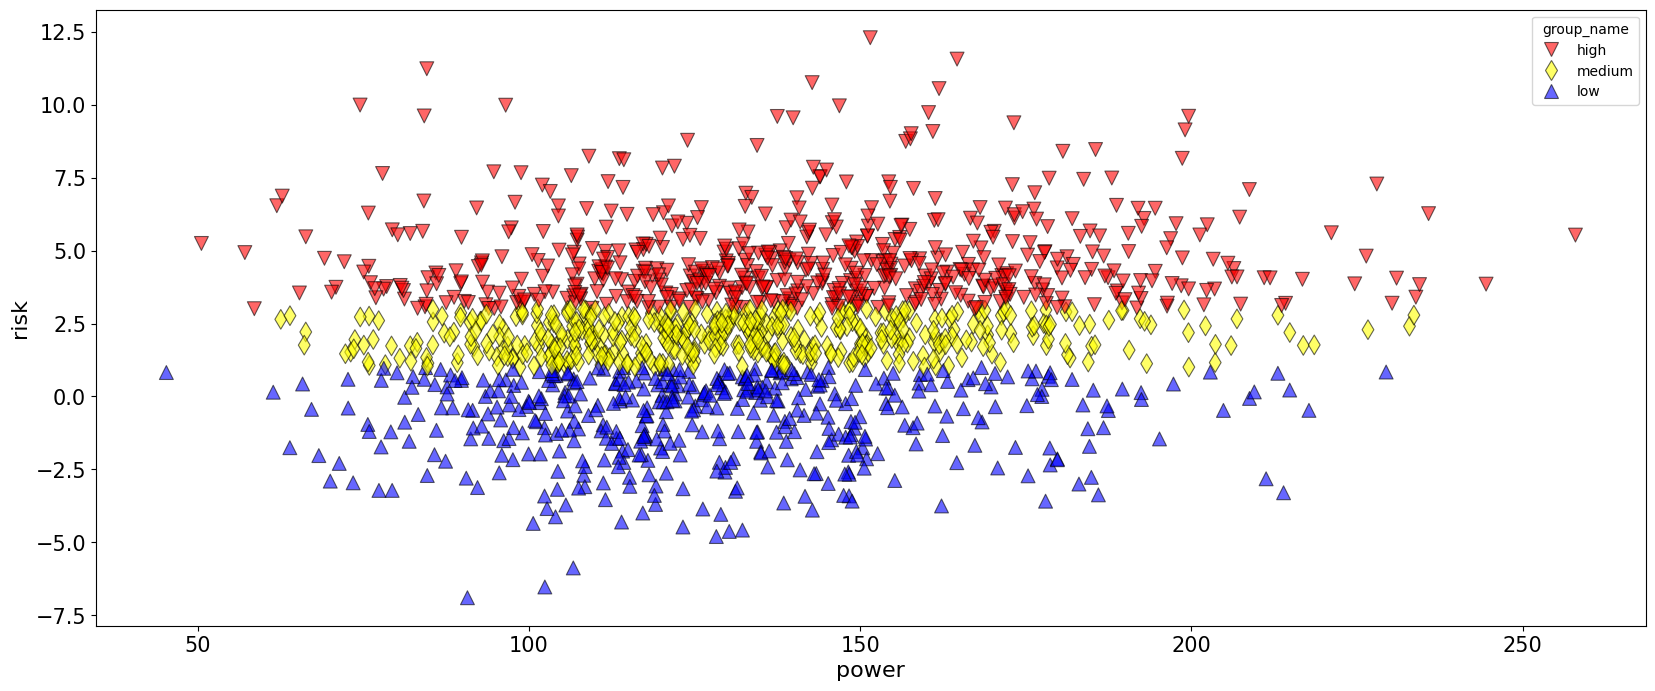

In [113]:
sns.scatterplot(x=generated_data['power'], 
                y=generated_data['risk'], 
                hue=generated_data['group_name'], 
                hue_order = ['high', 'medium', 'low'],
                palette=colors,  
                style=generated_data['group_name'], 
                style_order = ['high', 'medium', 'low'],
                markers=markers,
                s=100,
                edgecolor='k',
                alpha=0.6
               );

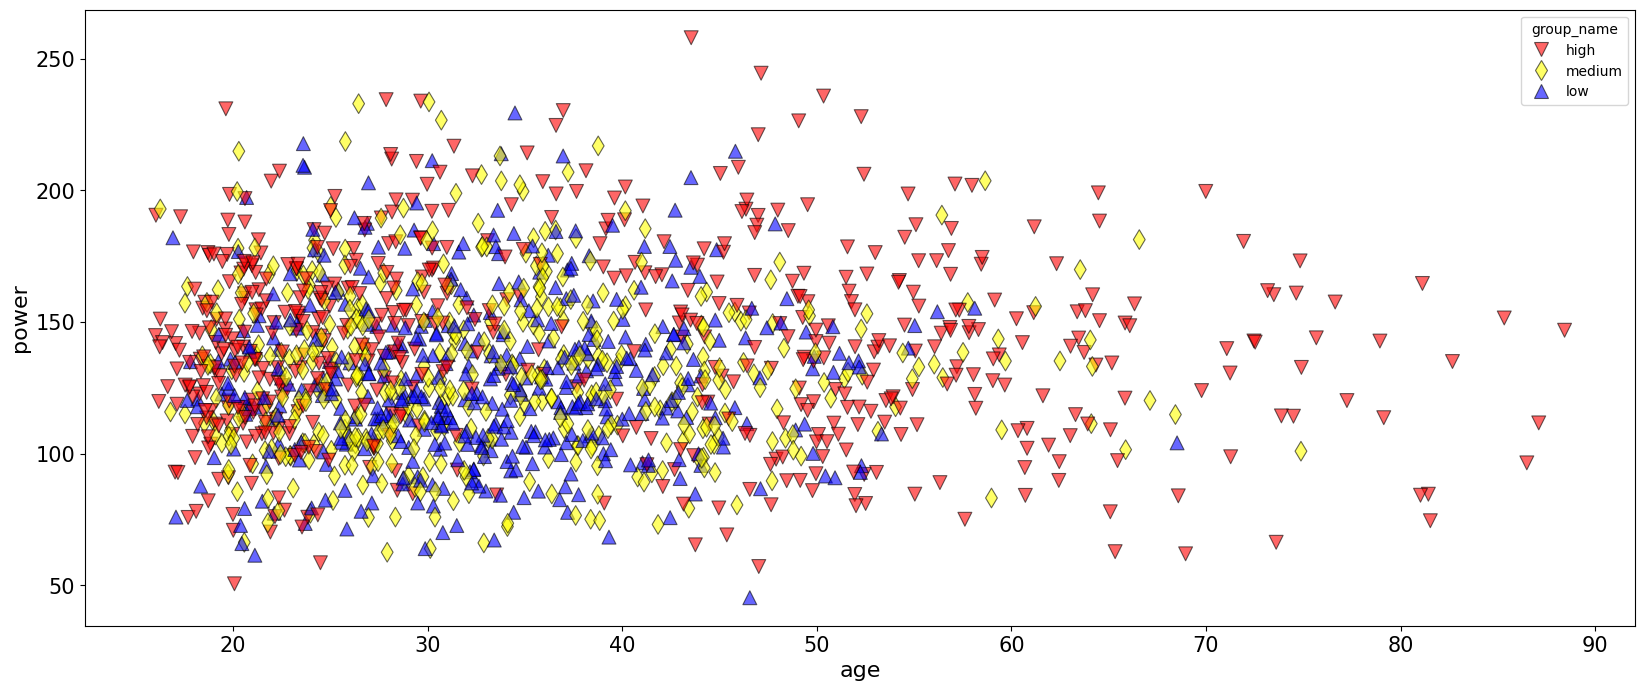

In [114]:
sns.scatterplot(x=generated_data['age'], 
                y=generated_data['power'], 
                hue=generated_data['group_name'], 
                hue_order = ['high', 'medium', 'low'],
                palette=colors,  
                style=generated_data['group_name'], 
                style_order = ['high', 'medium', 'low'],
                markers=markers,
                s=100,
                edgecolor='k',
                alpha=0.6
               );

In [115]:
gen_1 = generated_data

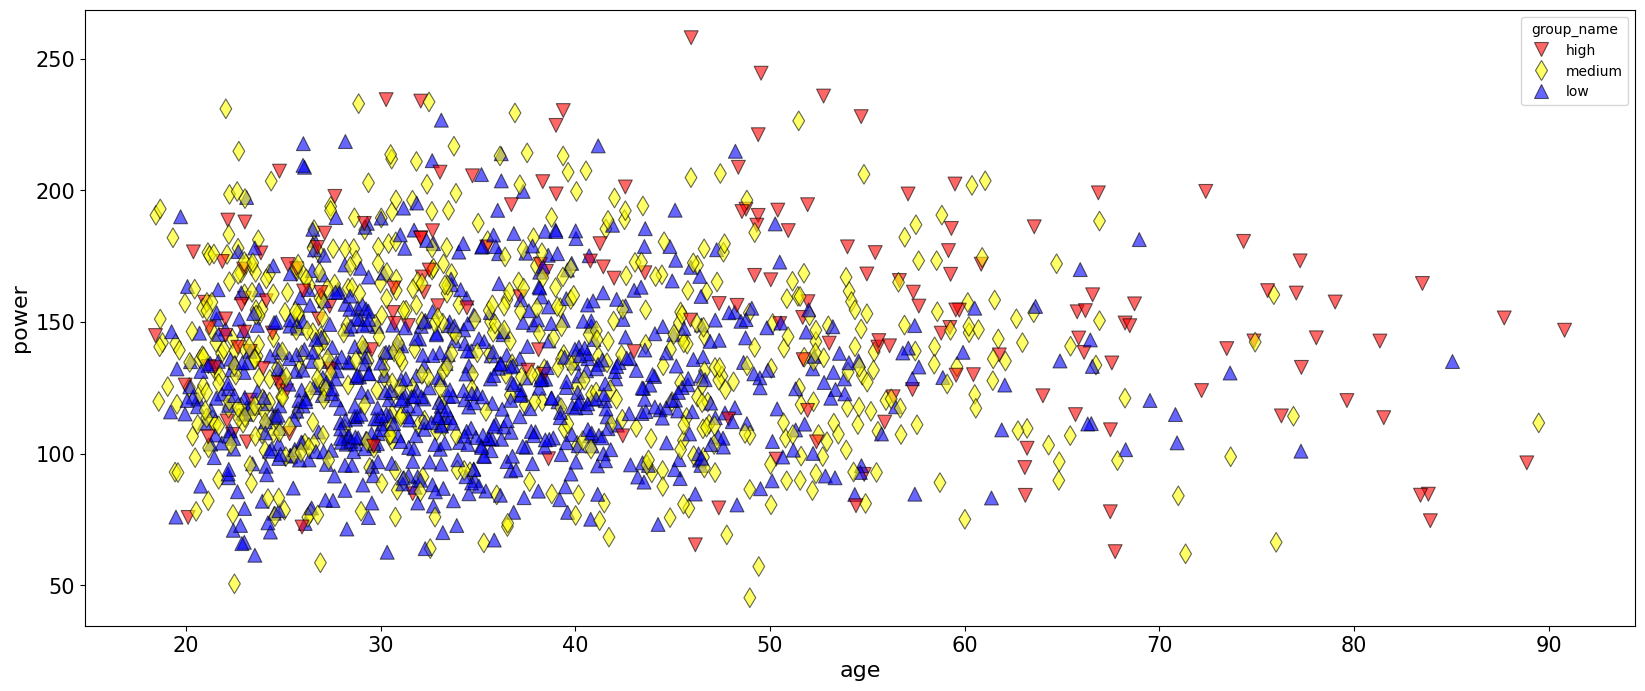

In [116]:
iteration = 24

generated_data = generate_risk_data(driver_weight = 4.0 - iteration * 0.1,
                                    age_drift = iteration * 0.1,
                                    emergency_braking_fraction = 0.40 + iteration * 0.02)
sns.scatterplot(x=generated_data['age'], 
                y=generated_data['power'], 
                hue=generated_data['group_name'], 
                hue_order = ['high', 'medium', 'low'],
                palette=colors,  
                style=generated_data['group_name'], 
                style_order = ['high', 'medium', 'low'],
                markers=markers,
                s=100,
                edgecolor='k',
                alpha=0.6
               );

In [117]:
np.unique(generated_data['group_name'], return_counts=True)

(array(['high', 'low', 'medium'], dtype=object), array([181, 727, 592]))

In [118]:
np.unique(generated_data['good_customer'], return_counts=True)

(array([0, 1]), array([ 427, 1073]))

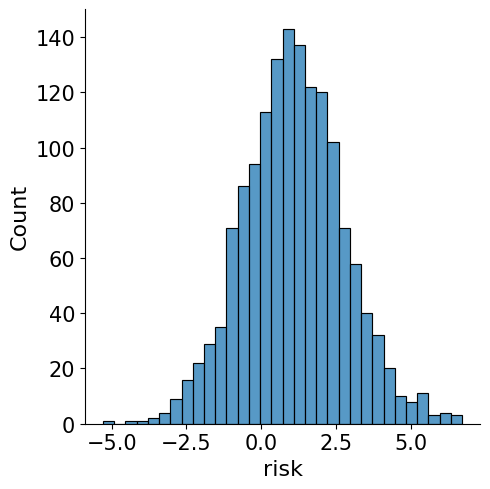

In [119]:
sns.displot(generated_data["risk"]);

In [120]:
generated_data.describe()

training          age  emergency_braking  braking_distance  \
count  1500.000000  1500.000000        1500.000000       1500.000000   
mean      0.207333    37.640226           0.890667         40.047327   
std       0.405532    13.191571           0.312161          5.292310   
min       0.000000    18.419190           0.000000         20.816722   
25%       0.000000    27.348022           1.000000         36.440032   
50%       0.000000    34.862481           1.000000         39.922413   
75%       0.000000    45.478459           1.000000         43.675832   
max       1.000000    90.825701           1.000000         57.645276   

             power       milage         risk        group  good_customer  
count  1500.000000  1500.000000  1500.000000  1500.000000    1500.000000  
mean    134.393736    80.415974     1.082789     1.364000       0.715333  
std      33.410677    25.536882     1.677782     0.687861       0.451406  
min      45.272791    27.414000    -5.288916     0.000000       0.000000  
25%     110.333073    61.828411    -0.018868     1.000000       0.000000  
50%     132.423028    76.275210     1.061455     1.000000       1.000000  
75%     155.296864    95.114365     2.145131     2.000000       1.000000  
max     257.983238   183.970662     6.702631     2.000000       1.000000

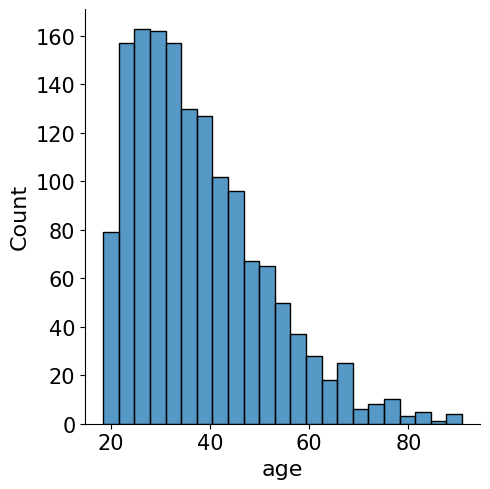

In [121]:
sns.displot(generated_data["age"]);

In [122]:
generated_data["age"].describe()

count    1500.000000
mean       37.640226
std        13.191571
min        18.419190
25%        27.348022
50%        34.862481
75%        45.478459
max        90.825701
Name: age, dtype: float64

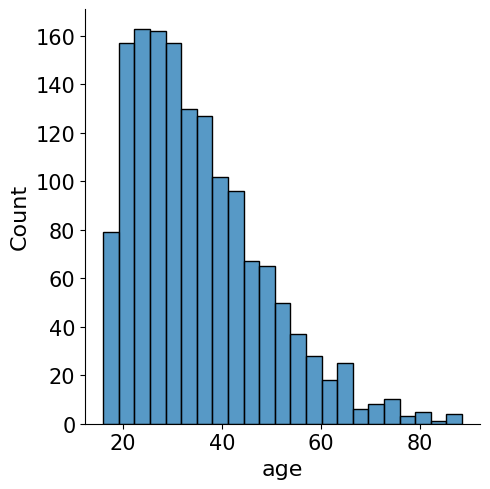

In [123]:
sns.displot(gen_1["age"]);

In [124]:
gen_1["age"].describe()

count    1500.000000
mean       35.240226
std        13.191571
min        16.019190
25%        24.948022
50%        32.462481
75%        43.078459
max        88.425701
Name: age, dtype: float64

# Generating generations of data

In [125]:
def generate_aged_data(iteration):
    assert iteration <= 36
    generated_data = generate_risk_data(driver_weight = 4.0 - iteration * 0.1,
                                        age_drift = iteration * 0.1,
                                        milage_drift = - iteration * 0.5,
                                        seed=iteration,
                                        emergency_braking_fraction = 0.40 + iteration * 0.015)
    return generated_data

In [126]:
!rm *.csv.gz

In [127]:
# first full data set, used for training
reference = generate_aged_data(0)

for iteration in range(1, 37):
    generated_data = generate_aged_data(iteration)
    file_name = f'./month-{iteration}.csv.gz'
    generated_data.to_csv(file_name, compression='gzip', index=False, sep=';')
    
    
file_name = './reference.csv.gz'
reference.to_csv(file_name, index=False, sep=';')

In [128]:
reference.head()

training        age  emergency_braking  braking_distance       power  \
0         0  41.951100                  0         40.933328  122.238329   
1         0  24.368286                  1         44.797317  113.765298   
2         0  18.314649                  1         41.587241  143.427269   
3         0  51.265254                  1         47.266716  111.578133   
4         0  23.578861                  0         42.835319  145.994235   

       milage      risk group_name  group  good_customer  
0   98.509765  3.705528       high      0              0  
1   46.324178  2.442419     medium      1              0  
2   76.862968  4.074379       high      0              0  
3  102.697069  5.093286       high      0              0  
4   63.690055  3.733844       high      0              0

In [129]:
reference.describe()

training          age  emergency_braking  braking_distance  \
count  1500.000000  1500.000000        1500.000000       1500.000000   
mean      0.210000    35.146663           0.394000         39.903294   
std       0.407444    12.765348           0.488798          4.781834   
min       0.000000    15.949545           0.000000         24.368993   
25%       0.000000    25.141921           0.000000         36.733165   
50%       0.000000    32.714683           0.000000         39.867888   
75%       0.000000    42.633629           1.000000         42.938777   
max       1.000000    86.213394           1.000000         56.463472   

             power       milage         risk        group  good_customer  
count  1500.000000  1500.000000  1500.000000  1500.000000    1500.000000  
mean    134.888089    80.965668     2.182905     0.902000       0.436667  
std      35.048570    25.496752     2.481600     0.815377       0.496138  
min      38.246253    18.796953    -5.283898     0.000000       0.000000  
25%     110.008660    62.666195     0.711191     0.000000       0.000000  
50%     131.055019    77.094819     2.388913     1.000000       0.000000  
75%     157.319959    95.568682     3.874870     2.000000       1.000000  
max     285.750164   211.807417    10.348509     2.000000       1.000000

In [130]:
np.unique(reference['group_name'], return_counts=True)

(array(['high', 'low', 'medium'], dtype=object), array([579, 432, 489]))

In [131]:
np.unique(reference['good_customer'], return_counts=True)

(array([0, 1]), array([845, 655]))

In [132]:
!ls

generate-causal.ipynb  month-16.csv.gz	month-25.csv.gz  month-34.csv.gz
insurance_prediction   month-17.csv.gz	month-26.csv.gz  month-35.csv.gz
model-based-1.csv      month-18.csv.gz	month-27.csv.gz  month-36.csv.gz
month-1.csv.gz	       month-19.csv.gz	month-28.csv.gz  month-4.csv.gz
month-10.csv.gz        month-2.csv.gz	month-29.csv.gz  month-5.csv.gz
month-11.csv.gz        month-20.csv.gz	month-3.csv.gz	 month-6.csv.gz
month-12.csv.gz        month-21.csv.gz	month-30.csv.gz  month-7.csv.gz
month-13.csv.gz        month-22.csv.gz	month-31.csv.gz  month-8.csv.gz
month-14.csv.gz        month-23.csv.gz	month-32.csv.gz  month-9.csv.gz
month-15.csv.gz        month-24.csv.gz	month-33.csv.gz  reference.csv.gz


In [133]:
import pandas as pd

iteration = 36

df = pd.read_csv(f'month-{iteration}.csv.gz', delimiter=';')
df.describe()

training          age  emergency_braking  braking_distance  \
count  1500.000000  1500.000000        1500.000000       1500.000000   
mean      0.180667    39.438736           0.938667         40.051490   
std       0.384870    13.261725           0.240021          5.072253   
min       0.000000    19.786403           0.000000         22.509900   
25%       0.000000    28.474238           1.000000         36.687131   
50%       0.000000    36.935743           1.000000         40.342817   
75%       0.000000    47.503926           1.000000         43.311050   
max       1.000000    96.931120           1.000000         57.967082   

             power       milage         risk        group  good_customer  
count  1500.000000  1500.000000  1500.000000  1500.000000    1500.000000  
mean    135.215854    62.765366     0.530882     1.622000       0.872000  
std      35.950635    25.582015     1.301688     0.539732       0.334201  
min      26.938595     5.000000    -3.828199     0.000000       0.000000  
25%     109.462877    43.222911    -0.381588     1.000000       1.000000  
50%     132.244743    58.121909     0.519117     2.000000       1.000000  
75%     155.987021    79.320875     1.393047     2.000000       1.000000  
max     284.698999   175.221602     5.531208     2.000000       1.000000

In [134]:
np.unique(df['group_name'], return_counts=True)

(array(['high', 'low', 'medium'], dtype=object), array([ 42, 975, 483]))

In [135]:
np.unique(df['good_customer'], return_counts=True)

(array([0, 1]), array([ 192, 1308]))

# Investigating Drift
* https://evidentlyai.com/blog/data-drift-detection-large-datasets


In [136]:
import evidently
evidently.__version__

'0.4.8'

In [137]:
from evidently.calculations.stattests.jensenshannon import jensenshannon_stat_test
from evidently.calculations.stattests.kl_div import kl_div_stat_test
from evidently.calculations.stattests.ks_stattest import ks_stat_test
from evidently.calculations.stattests.psi import psi_stat_test
from evidently.calculations.stattests.wasserstein_distance_norm import wasserstein_stat_test

In [138]:
# if the above fails
# !pip install --upgrade --force-reinstall evidently

## Age does drift 

In [139]:
# ks and wasserstein drift shortly after 10

In [140]:
# does not drift
# iteration = 12
# drifted
# iteration = 13
iteration = 36

generated_data = generate_aged_data(iteration)
wasserstein_stat_test(gen_1["age"], generated_data["age"], 'num', threshold=None)

StatTestResult(drift_score=0.31837832149382617, drifted=True, actual_threshold=0.1)

In [141]:
# does not drift
# iteration = 10
# drifted
# iteration = 11
iteration = 36
generated_data = generate_aged_data(iteration)
ks_stat_test(gen_1["age"], generated_data["age"], 'num', threshold=None)

StatTestResult(drift_score=2.3432446792419765e-14, drifted=True, actual_threshold=0.05)

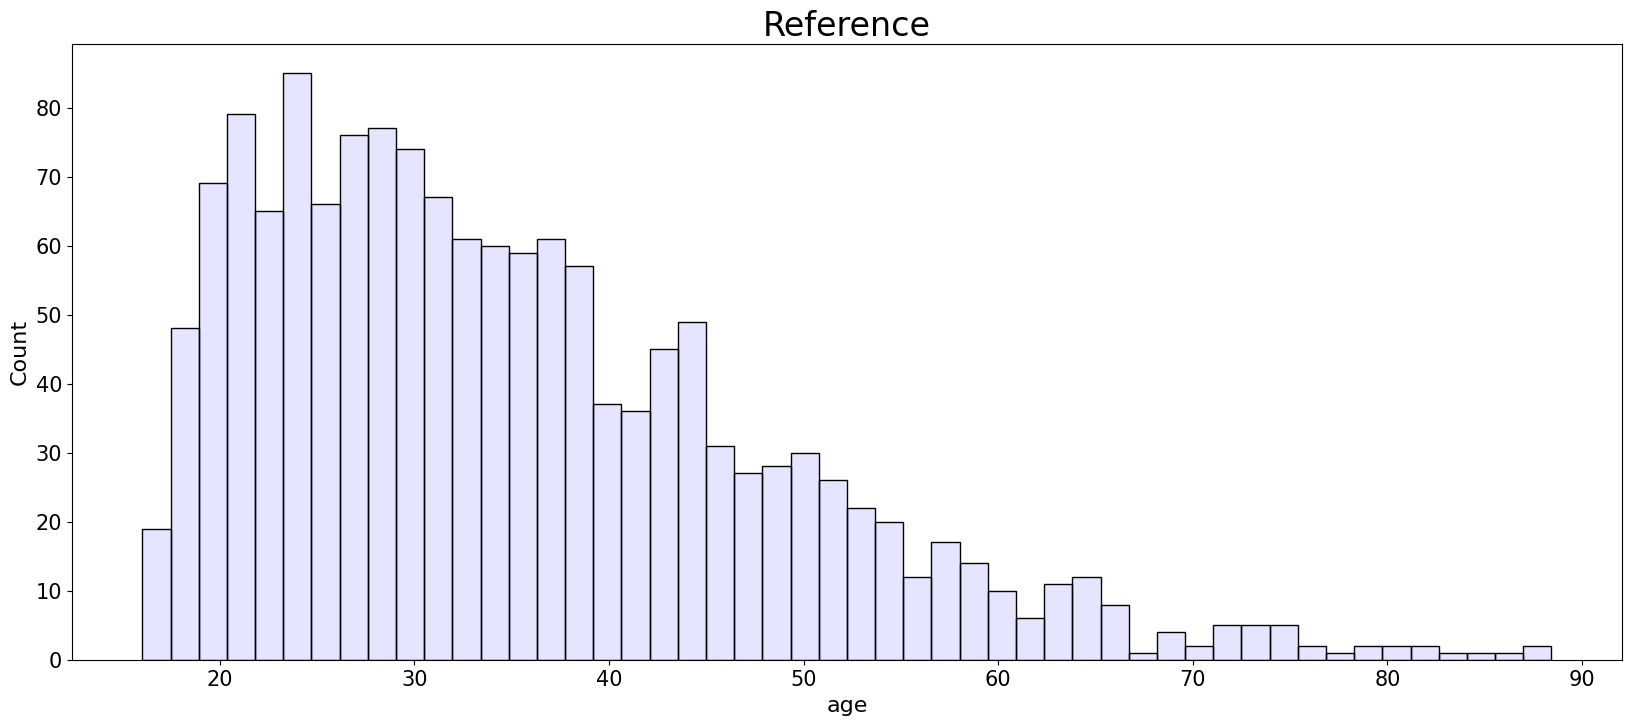

In [142]:
plt.title('Reference')
sns.histplot(gen_1["age"], color='blue', bins=50, alpha=0.1);

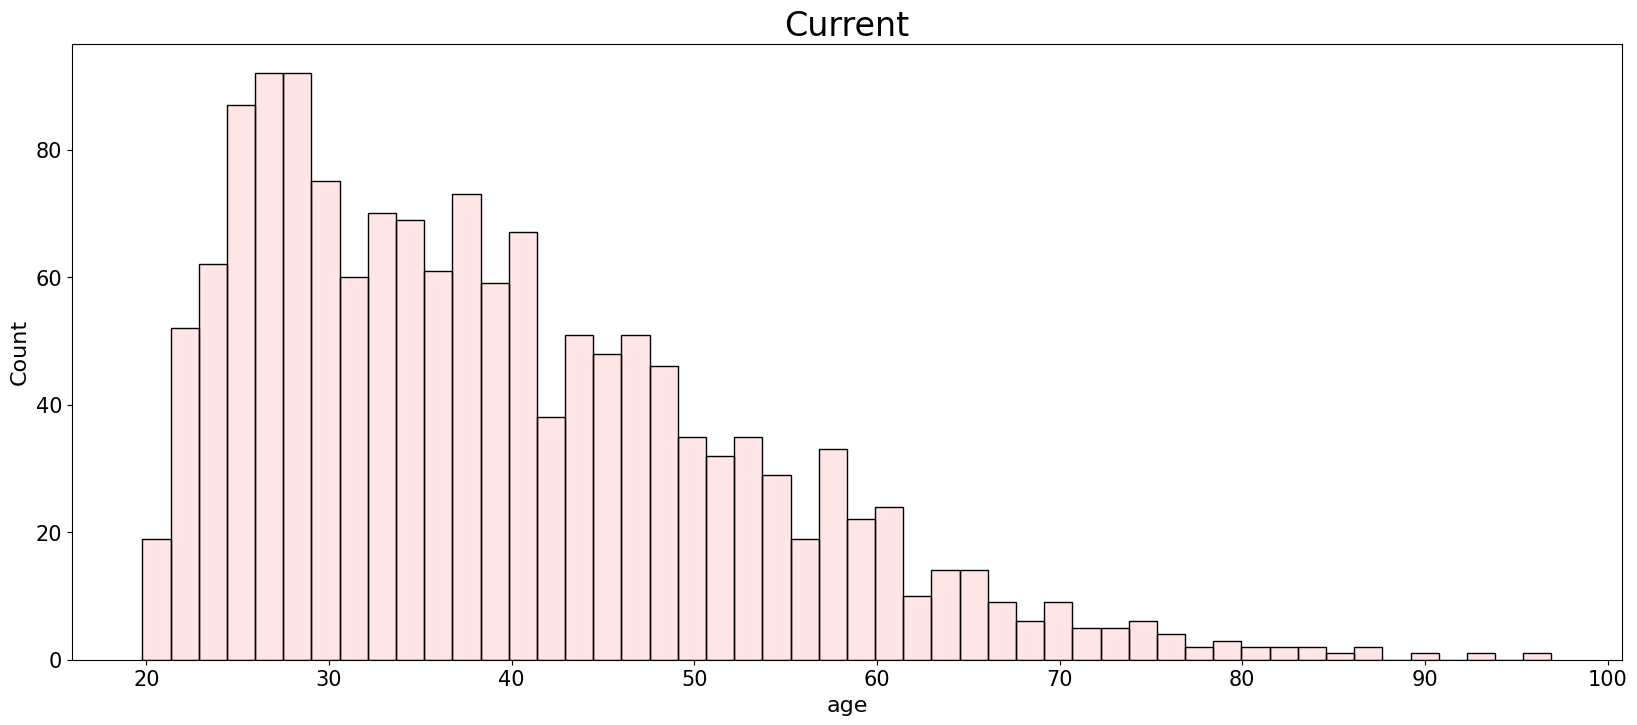

In [143]:
plt.title('Current')

sns.histplot(generated_data["age"], color='red', bins=50, alpha=0.1);

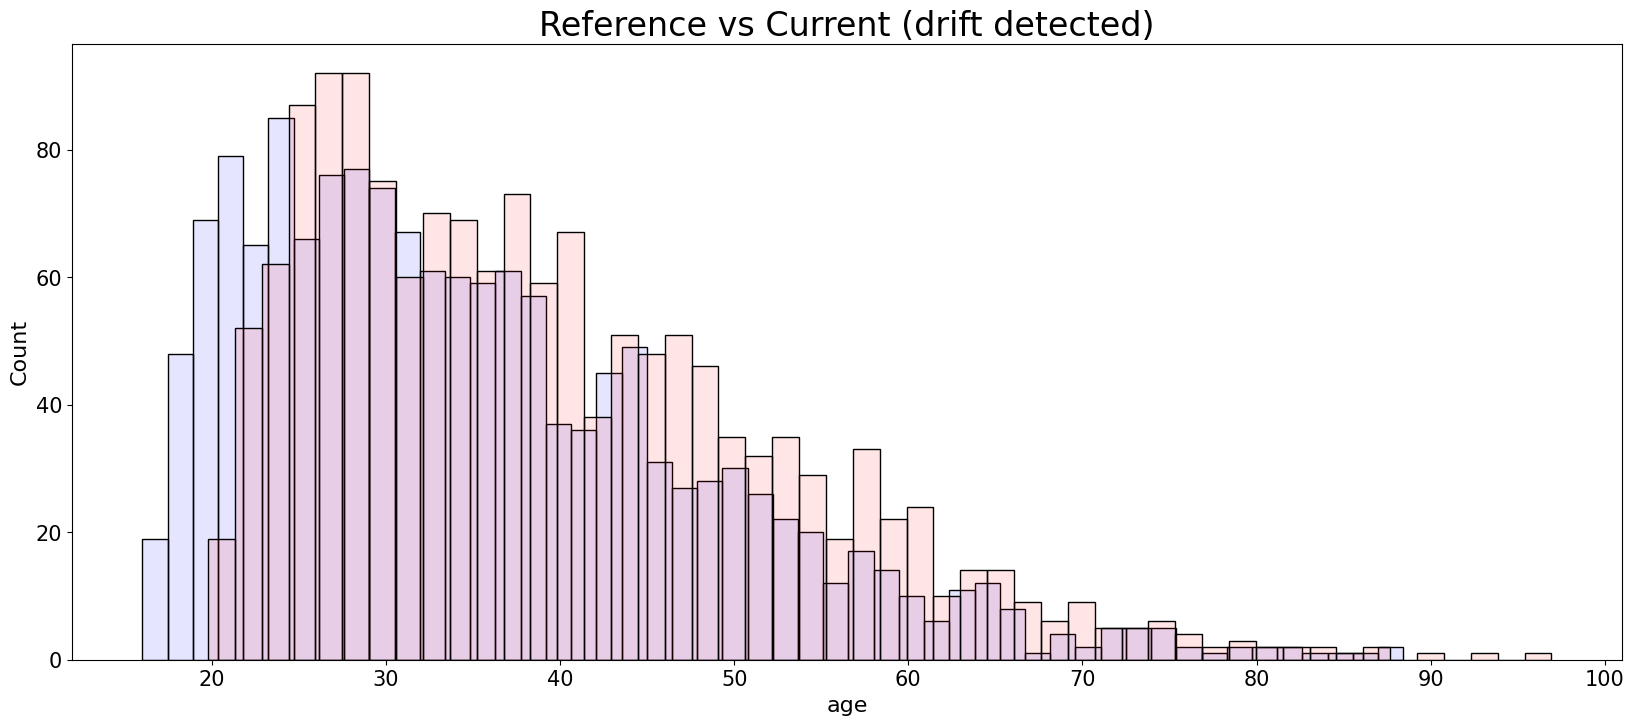

In [144]:
plt.title('Reference vs Current (drift detected)')

sns.histplot(gen_1["age"], color='blue', bins=50, alpha=0.1);
sns.histplot(generated_data["age"], color='red', bins=50, alpha=0.1);

In [145]:
# does not drift
# iteration = 10
# drifted
# iteration = 11
iteration = 2
generated_data = generate_aged_data(iteration)
ks_stat_test(gen_1["age"], generated_data["age"], 'num', threshold=None)

StatTestResult(drift_score=0.7516787908604354, drifted=False, actual_threshold=0.05)

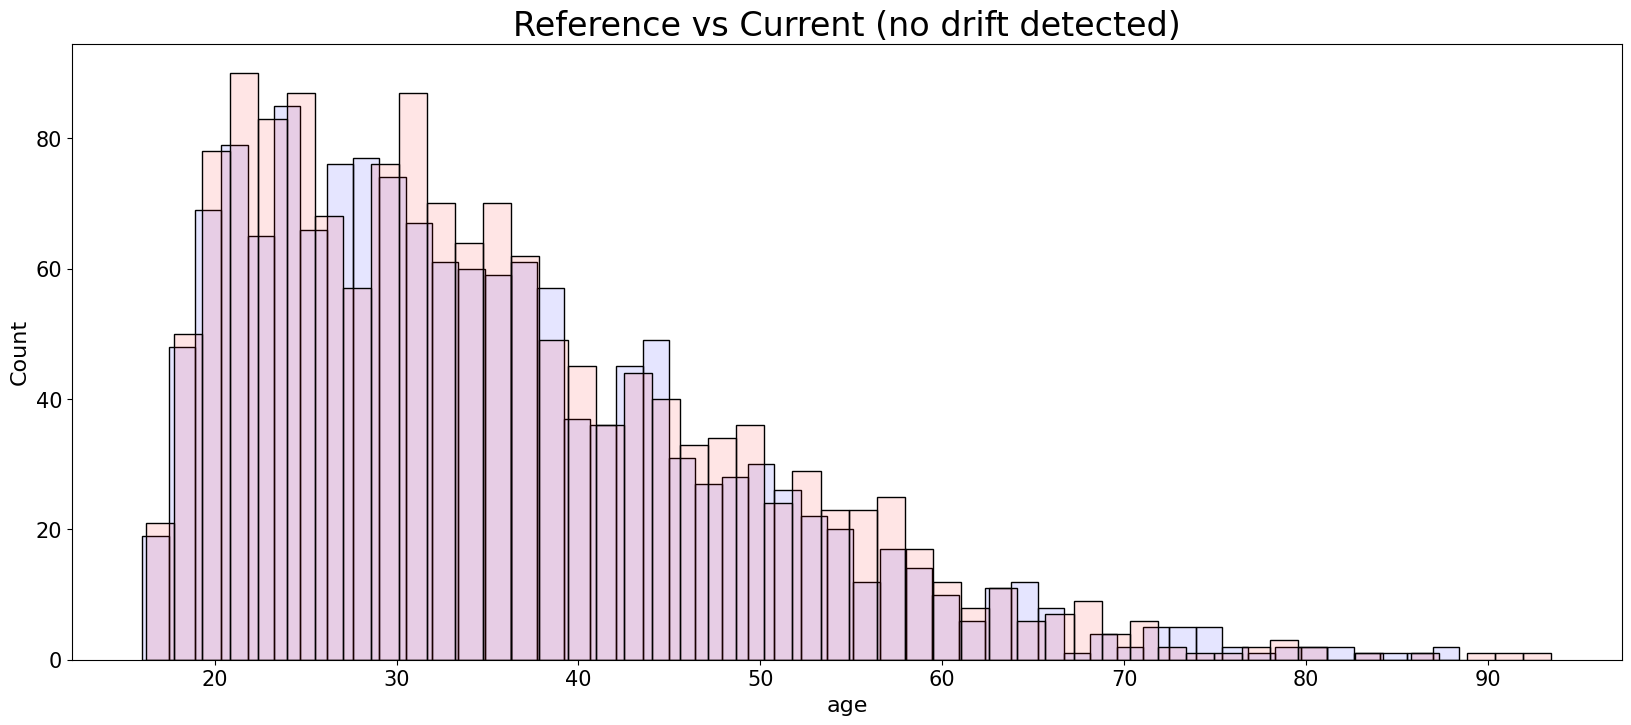

In [146]:
plt.title('Reference vs Current (no drift detected)')

sns.histplot(gen_1["age"], color='blue', bins=50, alpha=0.1);
sns.histplot(generated_data["age"], color='red', bins=50, alpha=0.1);

## Investigating more features

In [147]:
gen_1.describe()

training          age  emergency_braking  braking_distance  \
count  1500.000000  1500.000000        1500.000000       1500.000000   
mean      0.207333    35.240226           0.370000         40.047327   
std       0.405532    13.191571           0.482965          5.292310   
min       0.000000    16.019190           0.000000         20.816722   
25%       0.000000    24.948022           0.000000         36.440032   
50%       0.000000    32.462481           0.000000         39.922413   
75%       0.000000    43.078459           1.000000         43.675832   
max       1.000000    88.425701           1.000000         57.645276   

             power       milage         risk        group  good_customer  
count  1500.000000  1500.000000  1500.000000  1500.000000    1500.000000  
mean    134.393736    80.415974     2.247416     0.909333       0.446667  
std      33.410677    25.536882     2.624168     0.823953       0.497313  
min      45.272791    27.414000    -6.895280     0.000000       0.000000  
25%     110.333073    61.828411     0.602794     0.000000       0.000000  
50%     132.423028    76.275210     2.346631     1.000000       0.000000  
75%     155.296864    95.114365     3.918869     2.000000       1.000000  
max     257.983238   183.970662    12.291869     2.000000       1.000000

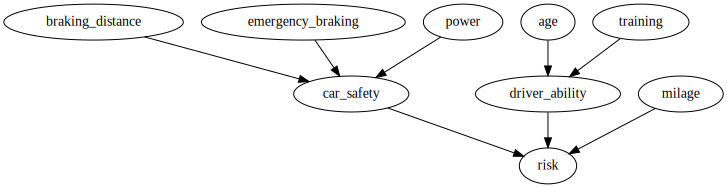

In [148]:
risk_model.cgm.draw()

## Emergy braking feature also does drift

In [149]:
# does not drift
# iteration = 8
# drifted
iteration = 9
generated_data = generate_aged_data(iteration)
jensenshannon_stat_test(gen_1["emergency_braking"], generated_data["emergency_braking"], 'cat', threshold=None)

StatTestResult(drift_score=0.10317547784755317, drifted=True, actual_threshold=0.1)

## milage drifts very quickly, people drive less

* JS and PSI seem less sensitive and need a clearer drift
* we might also increase the threshold

In [150]:
# KS and Wasserstein detect drift
iteration = 7
# JS and PSI detect drift
iteration = 8
generated_data = generate_aged_data(iteration)

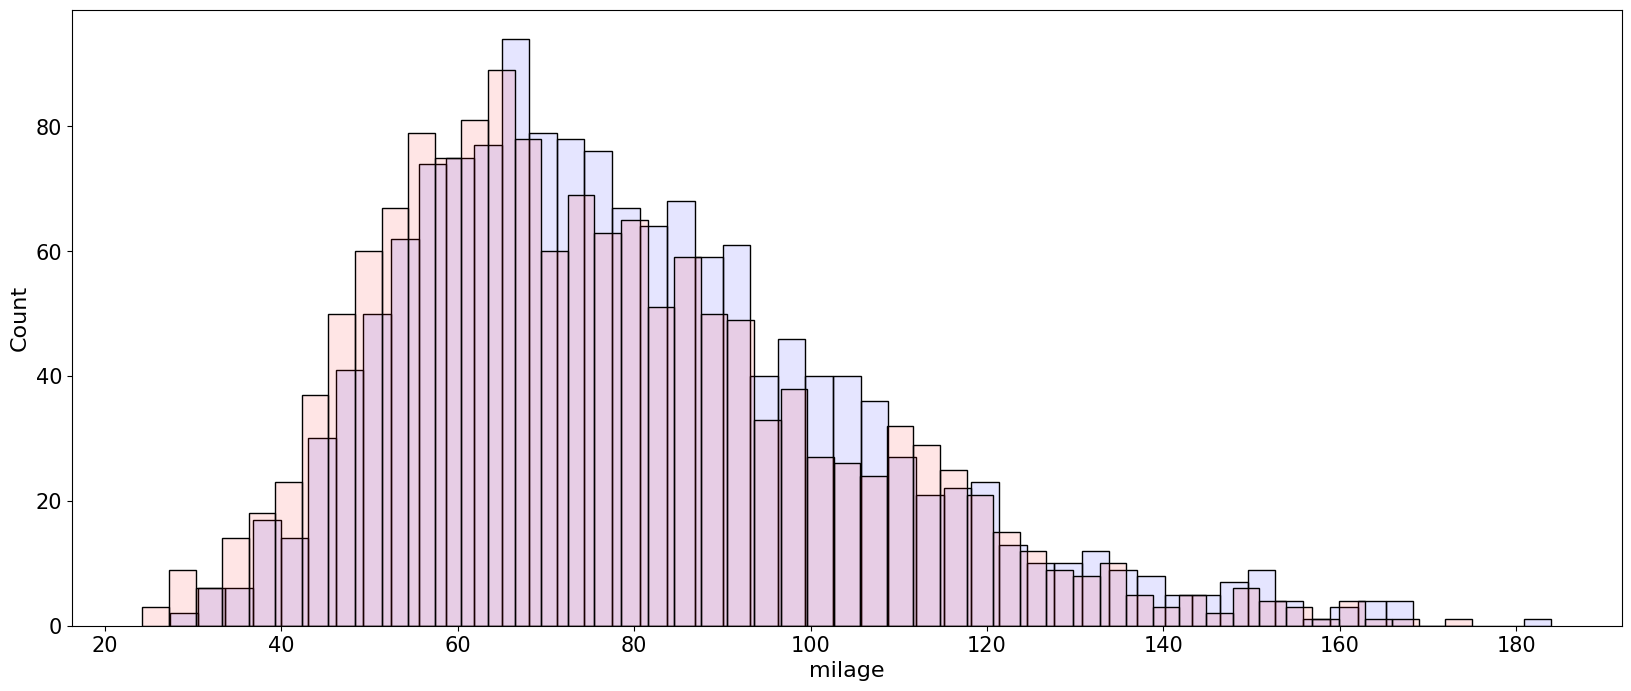

In [151]:
sns.histplot(gen_1["milage"], color='blue', bins=50, alpha=0.1);
sns.histplot(generated_data["milage"], color='red', bins=50, alpha=0.1);

In [152]:
wasserstein_stat_test(gen_1["milage"], generated_data["milage"], 'num', threshold=None)

StatTestResult(drift_score=0.14193916918357094, drifted=True, actual_threshold=0.1)

In [153]:
ks_stat_test(gen_1["milage"], generated_data["milage"], 'num', threshold=None)

StatTestResult(drift_score=4.238115360531035e-05, drifted=True, actual_threshold=0.05)

In [154]:
jensenshannon_stat_test(gen_1["milage"], generated_data["milage"], 'num', threshold=None)

StatTestResult(drift_score=0.8325546111576978, drifted=True, actual_threshold=0.1)

In [155]:
psi_stat_test(gen_1["milage"], generated_data["milage"], 'num', threshold=None)

StatTestResult(drift_score=3.2251039743059975, drifted=True, actual_threshold=0.1)

## braking distance does not drift, we only have slight statistical variations

In [156]:
iteration = 36
generated_data = generate_aged_data(iteration)

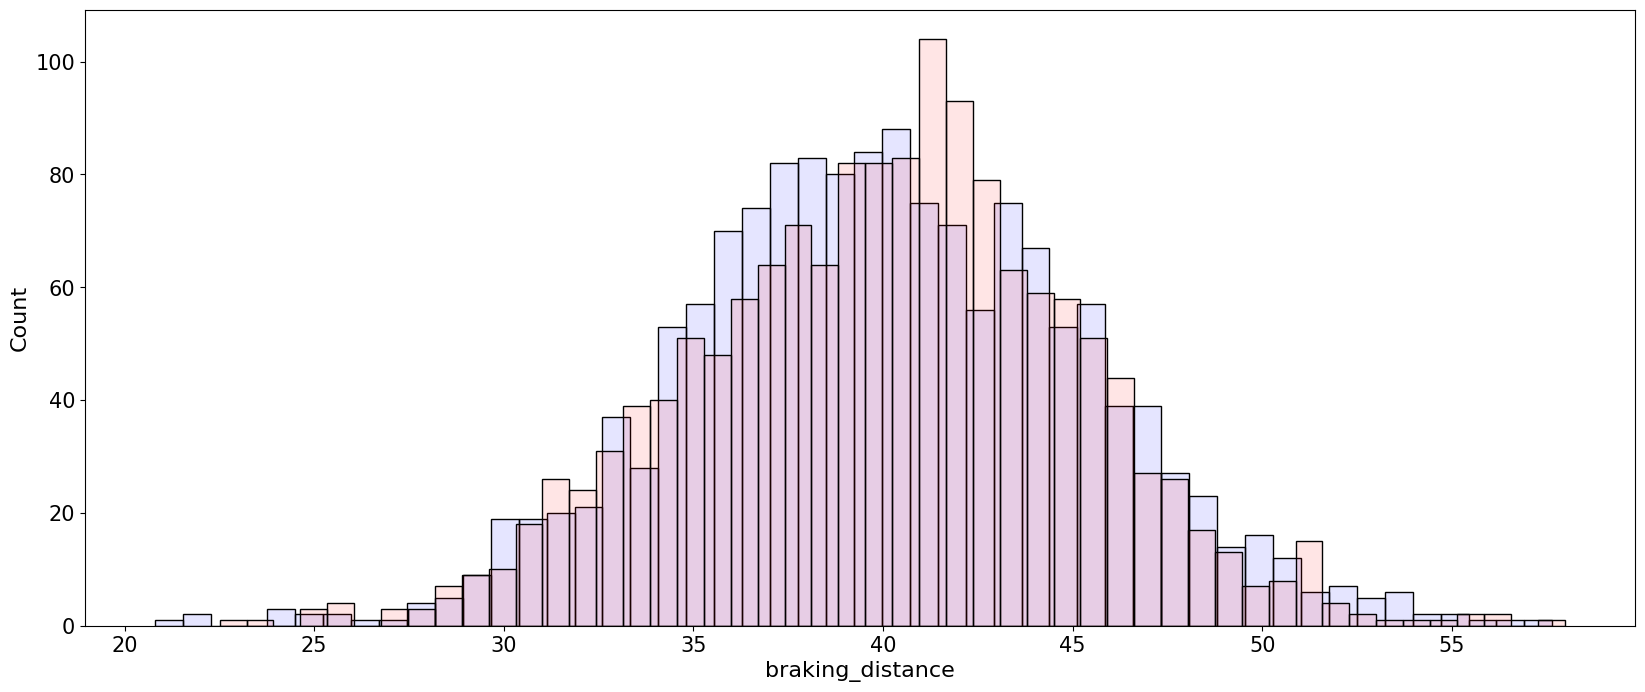

In [157]:
sns.histplot(gen_1["braking_distance"], color='blue', bins=50, alpha=0.1);
sns.histplot(generated_data["braking_distance"], color='red', bins=50, alpha=0.1);

In [158]:
wasserstein_stat_test(gen_1["braking_distance"], generated_data["braking_distance"], 'num', threshold=None)

StatTestResult(drift_score=0.0619686940147264, drifted=False, actual_threshold=0.1)

In [159]:
ks_stat_test(gen_1["braking_distance"], generated_data["braking_distance"], 'num', threshold=None)

StatTestResult(drift_score=0.19626576377865276, drifted=False, actual_threshold=0.05)

In [160]:
jensenshannon_stat_test(gen_1["braking_distance"], generated_data["braking_distance"], 'num', threshold=None)

StatTestResult(drift_score=0.8325546111576977, drifted=True, actual_threshold=0.1)

In [161]:
psi_stat_test(gen_1["braking_distance"], generated_data["braking_distance"], 'num', threshold=None)

StatTestResult(drift_score=3.2251039743059975, drifted=True, actual_threshold=0.1)